# Custom Theme

In [1]:
%useLatestDescriptors
%use dataframe
%use lets-plot

In [2]:
val df = DataFrame.readCSV("https://raw.githubusercontent.com/JetBrains/lets-plot-kotlin/master/docs/examples/data/mpg.csv")
val dataMap = df.toMap()
df.head(3)

DataFrame: rowsCount = 3, columnsCount = 12 
 untitled manufacturer model displ year cyl trans drv cty hwy fl class 1 audi a4 1.800000 1999 4 auto(l5) f 18 29 p compact 2 audi a4 1.800000 1999 4 manual(m5) f 21 29 p compact 3 audi a4 2.000000 2008 4 manual(m6) f 20 31 p compact

In [3]:
import org.jetbrains.letsPlot.intern.Plot
import org.jetbrains.letsPlot.intern.layer.geom.PointMapping
import org.jetbrains.letsPlot.intern.OptionsMap
import org.jetbrains.letsPlot.intern.layer.SamplingOptions

fun barTitle(subtitle: String): OptionsMap {
    return ggtitle("Bar plot", subtitle)
}

fun barPlot(color: String? = "fl", facet: Boolean = false, sampling: SamplingOptions? = null): Plot {
    val p = letsPlot(dataMap) +
        geomBar(sampling = sampling,
                tooltips = layerTooltips().title("Fuel type: @fl").line("count|@..count.."),
                labels = layerLabels().line("@..count..")) {
                    this.x = "fl"; this.color = color; this.fill = color
                }
    return if (facet) {
        p + facetGrid(x = "year")
    } else {
        p
    }
}

fun pointTitle(subtitle: String): OptionsMap {
    return ggtitle("Point plot", subtitle)
}

fun pointPlot(sizeOnly: Boolean = false, colorOnly: Boolean = false): Plot {
    return when {
        sizeOnly && colorOnly -> letsPlot(dataMap) { x = "cty"; y = "hwy" } + geomPoint(alpha = .25)
        sizeOnly && !colorOnly -> letsPlot(dataMap) { x = "cty"; y = "hwy" } + geomPoint(alpha = .25) { size = "cyl" }
        !sizeOnly && colorOnly -> letsPlot(dataMap) { x = "cty"; y = "hwy" } + geomPoint(alpha = .25) { color = "drv" }
        else -> letsPlot(dataMap) { x = "cty"; y = "hwy" } + geomPoint(alpha = .25) { size = "cyl"; color = "drv" }
    }
}

## Custom Theme

In [4]:
import org.jetbrains.letsPlot.intern.Feature

fun themeOrange(): Feature {
    val yellowLight = "#ffffcc"
    val orangeLight = "#fff5eb"
    val orangeNormal = "#f16913"
    val orangeDark = "#7f2704"
    return themeNone() + theme(
        line = elementLine(color = orangeNormal, size = 2),
        rect = elementRect(color = orangeNormal, fill = orangeLight, size = 2),
        text = elementText(color = orangeDark),
        geom = elementGeom(pen = orangeDark),
        axisOntop = true,
        axisTicks = elementLine(color = orangeNormal, size = 2),
        axisTicksLength = 7,
        legendBackground = elementRect(fill = orangeLight, size = 2),
        panelGridMajor = elementLine(color = orangeNormal, size = 1),
        panelGridMinor = elementBlank(),
        plotBackground = elementRect(fill = yellowLight, size = 2),
        plotTitle = elementText(size = 20, face = "bold"),
        axisTooltip = elementRect(color = orangeDark)
    ).legendPositionBottom()
}

In [5]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() + themeOrange() + barTitle("Custom theme"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M50.74057137279594 229.5 C50.74057137279594 229.5 52.690571372795944 229.5 52.690571372795944 227.55 L52.690571372795944 218.45 C52.69057137279

## Theme Elements

### Lines

In [6]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(panelGrid = elementLine(color = "red", size = 2, linetype = "longdash")) +
        barTitle("Custom elementLine() for panel grid"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

### Rectangles

In [7]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(panelBackground = elementRect(color = "black", fill = "lightgray", size = 2, linetype = "longdash")) +
        barTitle("Custom elementRect() for panel background"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

### Texts

In [8]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axisTextY = elementText(color = "red", family = "Times",
                                      face = "bold", size = 20, angle = 15,
                                      margin = listOf(0, 15), vjust = .5)) +
        barTitle("Custom elementText() for y-axis text"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M40.275221455755755 282.5 C40.275221455755755 282.5 42.22522145575576 282.5 42.22522145575576 280.55 L42.22522145575576 271.45 C42.225221455755

In [9]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(plotTitle = elementText(size = 20, hjust = .5, margin = listOf(20, 0, 10))) +
        barTitle("Custom elementText() for plotTitle"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 252.5 C44.98236686994011 252.5 46.93236686994011 252.5 46.93236686994011 250.55 L46.93236686994011 241.45 C46.93236686994011

#### Markdown

In [10]:
gggrid(listOf(
    barPlot() + barTitle("<span style='color:red'>**Markdown**</span> in _text_"),
    barPlot() +
        theme(title = elementMarkdown()) +
        barTitle("<span style='color:red'>**Markdown**</span> in _text_"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 <span style='color:red'>**Markdown**</span> in _text_ 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.5

### Geometries

In [11]:
gggrid(listOf(
    barPlot(color = null) + barTitle("Default"),
    barPlot(color = null) +
        theme(geom = elementGeom(brush = "yellow", paper = "red")) +
        barTitle("Custom elementGeom() for geom"),
))

<path d="M52.08962797656953 282.5 C52.08962797656953 282.5 54.039627976569534 282.5 54.039627976569534 280.55 L54.039627976569534 271.45 C54.039627976569534 271.45 54.039627976569534 269.5 52.08962797656953 269.5 L40.02841706563313 269.5 C40.02841706563313 269.5 38.078417065633126 269.5 38.078417065633126 271.45 L38.078417065633126 280.55 C38.078417065633126 280.55 38.078417065633126 282.5 40.02841706563313 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M126.93996535215182 282.5 C126.93996535215182 282.5 128.88996535215182 282.5 128.88996535215182 280.55 L128.88996535215182 271.45 C128.88996535215182 271.45 128.88996535215182 269.5 126.93996535215182 269.5 L106.89814898574721 269.5 C106.89814898574721 269.5 104.94814898574721 269.5 104.94814898574721 271.45 L104.94814898574721 280.55 C104.94814898574721 280.55 104.94814898574721 282.5 106.89814898574721 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M189.8193945445318 272.6434240362812 C189.8193945445318 272.6434240362812 191.7693945445318 272.6434240362812 191.7693945445318 270.6934240362812 L191.7693945445318 261.5934240362812 C191.7693945445318 261.5934240362812 191.7693945445318 259.6434240362812 189.8193945445318 259.6434240362812 L185.73878908906357 259.6434240362812 C185.73878908906357 259.6434240362812 183.78878908906358 259.6434240362812 183.78878908906358 261.5934240362812 L183.78878908906358 270.6934240362812 C183.78878908906358 270.6934240362812 183.78878908906358 272.6434240362812 185.73878908906357 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M260.6794291923799 277.5583900226757 C260.6794291923799 277.5583900226757 262.6294291923799 277.5583900226757 262.6294291923799 275.60839002267574 L262.6294291923799 266.5083900226757 C262.6294291923799 266.5083900226757 262.6294291923799 264.5583900226757 260.6794291923799 264.5583900226757 L256.5988237369117 264.5583900226757 C256.5988237369117 264.5583900226757 254.6488237369117 264.5583900226757 254.6488237369117 266.5083900226757 L254.6488237369117 275.60839002267574 C254.6488237369117 275.60839002267574 254.6488237369117 277.5583900226757 256.5988237369117 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M331.5394638402281 284.1116780045351 C331.5394638402281 284.1116780045351 333.4894638402281 284.1116780045351 333.4894638402281 282.16167800453513 L333.4894638402281 273.0616780045351 C333.4894638402281 273.0616780045351 333.4894638402281 271.1116780045351 331.5394638402281 271.1116780045351 L327.4588583847599 271.1116780045351 C327.4588583847599 271.1116780045351 325.5088583847599 271.1116780045351 325.5088583847599 273.0616780045351 L325.5088583847599 282.16167800453513 C325.5088583847599 282.16167800453513 325.5088583847599 284.1116780045351 327.4588583847599 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M52.08962797656953 282.5 C52.08962797656953 282.5 54.039627976569534 282.5 54.039627976569534 280.55 L54.039627976569534 271.45 C54.039627976569534 271.45 54.039627976569534 269.5 52.08962797656953 269.5 L40.02841706563313 269.5 C40.02841706563313 269.5 38.078417065633126 269.5 38.078417065633126 271.45 L38.07841706563

### Blank

In [12]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(panelGrid = elementBlank()) +
        barTitle("panelGrid = elementBlank()"),
    barPlot() +
        theme(panelGrid = "blank") +
        barTitle("panelGrid = \"blank\""),
    barPlot() +
        theme(panelGrid = elementLine(blank = true)) +
        barTitle("panelGrid = elementLine(blank = true)"),
), ncol = 2)

<path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 175.95 C46.93236686994011 175.95 46.93236686994011 174.0 44.98236686994011 174.0 L32.92115595900371 174.0 C32.92115595900371 174.0 30.97115595900371 174.0 30.97115595900371 175.95 L30.97115595900371 185.05 C30.97115595900371 185.05 30.97115595900371 187.0 32.92115595900371 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 187.0 C108.89845638916947 187.0 110.84845638916947 187.0 110.84845638916947 185.05 L110.84845638916947 175.95 C110.84845638916947 175.95 110.84845638916947 174.0 108.89845638916947 174.0 L88.85664002276486 174.0 C88.85664002276486 174.0 86.90664002276486 174.0 86.90664002276486 175.95 L86.90664002276486 185.05 C86.90664002276486 185.05 86.90664002276486 187.0 88.85664002276486 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 181.47448979591837 C160.84363772519652 181.47448979591837 162.7936377251965 181.47448979591837 162.7936377251965 179.52448979591838 L162.7936377251965 170.42448979591836 C162.7936377251965 170.42448979591836 162.7936377251965 168.47448979591837 160.84363772519652 168.47448979591837 L156.76303226972828 168.47448979591837 C156.76303226972828 168.47448979591837 154.8130322697283 168.47448979591837 154.8130322697283 170.42448979591836 L154.8130322697283 179.52448979591838 C154.8130322697283 179.52448979591838 154.8130322697283 181.47448979591837 156.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 184.76530612244898 C220.76942451669177 184.76530612244898 222.71942451669176 184.76530612244898 222.71942451669176 182.815306122449 L222.71942451669176 173.71530612244896 C222.71942451669176 173.71530612244896 222.71942451669176 171.76530612244898 220.76942451669177 171.76530612244898 L216.68881906122354 171.76530612244898 C216.68881906122354 171.76530612244898 214.73881906122355 171.76530612244898 214.73881906122355 173.71530612244896 L214.73881906122355 182.815306122449 C214.73881906122355 182.815306122449 214.73881906122355 184.76530612244898 216.68881906122354 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 189.1530612244898 C280.695211308187 189.1530612244898 282.645211308187 189.1530612244898 282.645211308187 187.2030612244898 L282.645211308187 178.10306122448978 C282.645211308187 178.10306122448978 282.645211308187 176.1530612244898 280.695211308187 176.1530612244898 L276.6146058527188 176.1530612244898 C276.6146058527188 176.1530612244898 274.6646058527188 176.1530612244898 274.6646058527188 178.10306122448978 L274.6646058527188 187.2030612244898 C274.6646058527188 187.2030612244898 274.6646058527188 189.1530612244898 276.6146058527188 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 175.95 C46.93236686994011 175.95 46.93

## Theme Parameters

### All Elements of Given Type

#### `line`

In [13]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(line = elementLine(linetype = "longdash")) +
        barTitle("Custom line"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `rect`

In [14]:
// The default theme has defaults for most rectangular elements,
// so we need to switch to another predefined theme to see the effect

gggrid(listOf(
    barPlot() + themeLight() + barTitle("Default"),
    barPlot() + themeLight() +
        theme(rect = elementRect(linetype = "longdash")) +
        barTitle("Custom rect"),
))

<path d="M44.49180083220426 282.5 C44.49180083220426 282.5 46.441800832204265 282.5 46.441800832204265 280.55 L46.441800832204265 271.45 C46.441800832204265 271.45 46.441800832204265 269.5 44.49180083220426 269.5 L32.43058992126787 269.5 C32.43058992126787 269.5 30.480589921267864 269.5 30.480589921267864 271.45 L30.480589921267864 280.55 C30.480589921267864 280.55 30.480589921267864 282.5 32.43058992126787 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M107.65317337030154 282.5 C107.65317337030154 282.5 109.60317337030155 282.5 109.60317337030155 280.55 L109.60317337030155 271.45 C109.60317337030155 271.45 109.60317337030155 269.5 107.65317337030154 269.5 L87.61135700389694 269.5 C87.61135700389694 269.5 85.66135700389694 269.5 85.66135700389694 271.45 L85.66135700389694 280.55 C85.66135700389694 280.55 85.66135700389694 282.5 87.61135700389694 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M158.84363772519652 272.6434240362812 C158.84363772519652 272.6434240362812 160.7936377251965 272.6434240362812 160.7936377251965 270.6934240362812 L160.7936377251965 261.5934240362812 C160.7936377251965 261.5934240362812 160.7936377251965 259.6434240362812 158.84363772519652 259.6434240362812 L154.76303226972828 259.6434240362812 C154.76303226972828 259.6434240362812 152.8130322697283 259.6434240362812 152.8130322697283 261.5934240362812 L152.8130322697283 270.6934240362812 C152.8130322697283 270.6934240362812 152.8130322697283 272.6434240362812 154.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M218.0147075355597 277.5583900226757 C218.0147075355597 277.5583900226757 219.96470753555968 277.5583900226757 219.96470753555968 275.60839002267574 L219.96470753555968 266.5083900226757 C219.96470753555968 266.5083900226757 219.96470753555968 264.5583900226757 218.0147075355597 264.5583900226757 L213.93410208009146 264.5583900226757 C213.93410208009146 264.5583900226757 211.98410208009147 264.5583900226757 211.98410208009147 266.5083900226757 L211.98410208009147 275.60839002267574 C211.98410208009147 275.60839002267574 211.98410208009147 277.5583900226757 213.93410208009146 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M277.1857773459229 284.1116780045351 C277.1857773459229 284.1116780045351 279.13577734592286 284.1116780045351 279.13577734592286 282.16167800453513 L279.13577734592286 273.0616780045351 C279.13577734592286 273.0616780045351 279.13577734592286 271.1116780045351 277.1857773459229 271.1116780045351 L273.10517189045464 271.1116780045351 C273.10517189045464 271.1116780045351 271.15517189045465 271.1116780045351 271.15517189045465 273.0616780045351 L271.15517189045465 282.16167800453513 C271.15517189045465 282.16167800453513 271.15517189045465 284.1116780045351 273.10517189045464 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.49180083220426 282.5 C44.49180083220426

#### `text` and `title`

In [15]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(text = elementText(color = "red")) +
        barTitle("Custom text"),
    barPlot() +
        theme(title = elementText(color = "blue")) +
        barTitle("Custom title"),
    barPlot() +
        theme(text = elementText(color = "red"), title = elementText(color = "blue")) +
        barTitle("Custom text and title"),
), ncol = 2)

<path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 175.95 C46.93236686994011 175.95 46.93236686994011 174.0 44.98236686994011 174.0 L32.92115595900371 174.0 C32.92115595900371 174.0 30.97115595900371 174.0 30.97115595900371 175.95 L30.97115595900371 185.05 C30.97115595900371 185.05 30.97115595900371 187.0 32.92115595900371 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 187.0 C108.89845638916947 187.0 110.84845638916947 187.0 110.84845638916947 185.05 L110.84845638916947 175.95 C110.84845638916947 175.95 110.84845638916947 174.0 108.89845638916947 174.0 L88.85664002276486 174.0 C88.85664002276486 174.0 86.90664002276486 174.0 86.90664002276486 175.95 L86.90664002276486 185.05 C86.90664002276486 185.05 86.90664002276486 187.0 88.85664002276486 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 181.47448979591837 C160.84363772519652 181.47448979591837 162.7936377251965 181.47448979591837 162.7936377251965 179.52448979591838 L162.7936377251965 170.42448979591836 C162.7936377251965 170.42448979591836 162.7936377251965 168.47448979591837 160.84363772519652 168.47448979591837 L156.76303226972828 168.47448979591837 C156.76303226972828 168.47448979591837 154.8130322697283 168.47448979591837 154.8130322697283 170.42448979591836 L154.8130322697283 179.52448979591838 C154.8130322697283 179.52448979591838 154.8130322697283 181.47448979591837 156.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 184.76530612244898 C220.76942451669177 184.76530612244898 222.71942451669176 184.76530612244898 222.71942451669176 182.815306122449 L222.71942451669176 173.71530612244896 C222.71942451669176 173.71530612244896 222.71942451669176 171.76530612244898 220.76942451669177 171.76530612244898 L216.68881906122354 171.76530612244898 C216.68881906122354 171.76530612244898 214.73881906122355 171.76530612244898 214.73881906122355 173.71530612244896 L214.73881906122355 182.815306122449 C214.73881906122355 182.815306122449 214.73881906122355 184.76530612244898 216.68881906122354 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 189.1530612244898 C280.695211308187 189.1530612244898 282.645211308187 189.1530612244898 282.645211308187 187.2030612244898 L282.645211308187 178.10306122448978 C282.645211308187 178.10306122448978 282.645211308187 176.1530612244898 280.695211308187 176.1530612244898 L276.6146058527188 176.1530612244898 C276.6146058527188 176.1530612244898 274.6646058527188 176.1530612244898 274.6646058527188 178.10306122448978 L274.6646058527188 187.2030612244898 C274.6646058527188 187.2030612244898 274.6646058527188 189.1530612244898 276.6146058527188 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 17

### Axes

#### `axis`

In [16]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axis = elementLine(color = "red", size = 3)) +
        barTitle("Custom axis"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `axisOntop`

In [17]:
gggrid(listOf(
    barPlot() +
        theme(axis = elementText(size = 4)) +
        barTitle("axisOntop = true (default)"),
    barPlot() +
        theme(axis = elementText(size = 4), axisOntop = false) +
        barTitle("axisOntop = false"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 axisOntop = true (default) 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 

#### `axisTitle`

In [18]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axisTitle = elementText(color = "red")) +
        barTitle("Custom axisTitle"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `axisText`

In [19]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axisText = elementText(color = "red")) +
        barTitle("Custom axisText"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `axisTicks` and `axisTicksLength`

In [20]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axisTicks = elementLine(color = "red", size = 3)) +
        barTitle("Custom axisTicks"),
    barPlot() +
        theme(axisTicksLength = 10) +
        barTitle("Custom axisTicksLength"),
))

<path d="M39.034253662392956 282.5 C39.034253662392956 282.5 40.98425366239296 282.5 40.98425366239296 280.55 L40.98425366239296 271.45 C40.98425366239296 271.45 40.98425366239296 269.5 39.034253662392956 269.5 L26.97304275145655 269.5 C26.97304275145655 269.5 25.02304275145655 269.5 25.02304275145655 271.45 L25.02304275145655 280.55 C25.02304275145655 280.55 25.02304275145655 282.5 26.97304275145655 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M136.59363772519652 272.6434240362812 C136.59363772519652 272.6434240362812 138.5436377251965 272.6434240362812 138.5436377251965 270.6934240362812 L138.5436377251965 261.5934240362812 C138.5436377251965 261.5934240362812 138.5436377251965 259.6434240362812 136.59363772519652 259.6434240362812 L132.51303226972828 259.6434240362812 C132.51303226972828 259.6434240362812 130.5630322697283 259.6434240362812 130.5630322697283 261.5934240362812 L130.5630322697283 270.6934240362812 C130.5630322697283 270.6934240362812 130.5630322697283 272.6434240362812 132.51303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M187.36848112046533 277.5583900226757 C187.36848112046533 277.5583900226757 189.31848112046532 277.5583900226757 189.31848112046532 275.60839002267574 L189.31848112046532 266.5083900226757 C189.31848112046532 266.5083900226757 189.31848112046532 264.5583900226757 187.36848112046533 264.5583900226757 L183.2878756649971 264.5583900226757 C183.2878756649971 264.5583900226757 181.3378756649971 264.5583900226757 181.3378756649971 266.5083900226757 L181.3378756649971 275.60839002267574 C181.3378756649971 275.60839002267574 181.3378756649971 277.5583900226757 183.2878756649971 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M238.14332451573418 284.1116780045351 C238.14332451573418 284.1116780045351 240.09332451573417 284.1116780045351 240.09332451573417 282.16167800453513 L240.09332451573417 273.0616780045351 C240.09332451573417 273.0616780045351 240.09332451573417 271.1116780045351 238.14332451573418 271.1116780045351 L234.06271906026595 271.1116780045351 C234.06271906026595 271.1116780045351 232.11271906026596 271.1116780045351 232.11271906026596 273.0616780045351 L232.11271906026596 282.16167800453513 C232.11271906026596 282.16167800453513 232.11271906026596 284.1116780045351 234.06271906026595 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M39.034253662392956 282.5 C39.034253662392956 282.5 40.98425366239296 282.5 40.98425366239296 280.55 L40.98425366239296 271.45 C40.98425366239296 271.45 40.98425366239296 269.5 39.034253662392956 269.5 L26.97304275145655 269.5 C26.97304275145655 269.5 25.02304275145655 269.5 25.02304275145655 271.45 L25.02304275145655 280.55 C25.02304275145655 280.55 25.02304275145655 282.5 26.97304275145655 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M136.59363772519652 272.6434240362812 C136.59363772519652 272.6434240362812 138.543637

#### `axisLine`

In [21]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axisLine = elementLine(color = "red", size = 3)) +
        barTitle("Custom axisLine"),
    barPlot() +
        theme(axis = elementLine(color = "red", size = 3),
              axisLine = elementLine(color = "blue", size = 3)) +
        barTitle("axis vs. axisLine"),
))

<path d="M39.034253662392956 282.5 C39.034253662392956 282.5 40.98425366239296 282.5 40.98425366239296 280.55 L40.98425366239296 271.45 C40.98425366239296 271.45 40.98425366239296 269.5 39.034253662392956 269.5 L26.97304275145655 269.5 C26.97304275145655 269.5 25.02304275145655 269.5 25.02304275145655 271.45 L25.02304275145655 280.55 C25.02304275145655 280.55 25.02304275145655 282.5 26.97304275145655 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M136.59363772519652 272.6434240362812 C136.59363772519652 272.6434240362812 138.5436377251965 272.6434240362812 138.5436377251965 270.6934240362812 L138.5436377251965 261.5934240362812 C138.5436377251965 261.5934240362812 138.5436377251965 259.6434240362812 136.59363772519652 259.6434240362812 L132.51303226972828 259.6434240362812 C132.51303226972828 259.6434240362812 130.5630322697283 259.6434240362812 130.5630322697283 261.5934240362812 L130.5630322697283 270.6934240362812 C130.5630322697283 270.6934240362812 130.5630322697283 272.6434240362812 132.51303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M187.36848112046533 277.5583900226757 C187.36848112046533 277.5583900226757 189.31848112046532 277.5583900226757 189.31848112046532 275.60839002267574 L189.31848112046532 266.5083900226757 C189.31848112046532 266.5083900226757 189.31848112046532 264.5583900226757 187.36848112046533 264.5583900226757 L183.2878756649971 264.5583900226757 C183.2878756649971 264.5583900226757 181.3378756649971 264.5583900226757 181.3378756649971 266.5083900226757 L181.3378756649971 275.60839002267574 C181.3378756649971 275.60839002267574 181.3378756649971 277.5583900226757 183.2878756649971 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M238.14332451573418 284.1116780045351 C238.14332451573418 284.1116780045351 240.09332451573417 284.1116780045351 240.09332451573417 282.16167800453513 L240.09332451573417 273.0616780045351 C240.09332451573417 273.0616780045351 240.09332451573417 271.1116780045351 238.14332451573418 271.1116780045351 L234.06271906026595 271.1116780045351 C234.06271906026595 271.1116780045351 232.11271906026596 271.1116780045351 232.11271906026596 273.0616780045351 L232.11271906026596 282.16167800453513 C232.11271906026596 282.16167800453513 232.11271906026596 284.1116780045351 234.06271906026595 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M39.034253662392956 282.5 C39.034253662392956 282.5 40.98425366239296 282.5 40.98425366239296 280.55 L40.98425366239296 271.45 C40.98425366239296 271.45 40.98425366239296 269.5 39.034253662392956 269.5 L26.97304275145655 269.5 C26.97304275145655 269.5 25.02304275145655 269.5 25.02304275145655 271.45 L25.02304275145655 280.55 C25.02304275145655 280.55 25.02304275145655 282.5 26.97304275145655 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M136.59363772519652 272.6434240362812 C136.59363772519652 272.6434240362812 138.543637

### Legend

#### `legendBackground`

In [22]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(legendBackground = elementRect(fill = "lightgray")) +
        barTitle("Custom legendBackground"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `legendText`

In [23]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(legendText = elementText(color = "red")) +
        barTitle("Custom legendText"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `legendTitle`

In [24]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(legendTitle = elementText(color = "red")) +
        barTitle("Custom legendTitle"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `legendMargin`

In [25]:
fun barPlotWithHighlightedLegend(): Plot {
    return barPlot() + theme(legendBackground = elementRect(size = 1))
}

gggrid(listOf(
    barPlotWithHighlightedLegend() +
        barTitle("Default"),
    barPlotWithHighlightedLegend() +
        theme(legendMargin = 25) +
        barTitle("Custom legendMargin"),
), ncol = 2)

<path d="M44.737083851072185 282.5 C44.737083851072185 282.5 46.68708385107219 282.5 46.68708385107219 280.55 L46.68708385107219 271.45 C46.68708385107219 271.45 46.68708385107219 269.5 44.737083851072185 269.5 L32.67587294013579 269.5 C32.67587294013579 269.5 30.725872940135787 269.5 30.725872940135787 271.45 L30.725872940135787 280.55 C30.725872940135787 280.55 30.725872940135787 282.5 32.67587294013579 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.27581487973552 282.5 C108.27581487973552 282.5 110.22581487973552 282.5 110.22581487973552 280.55 L110.22581487973552 271.45 C110.22581487973552 271.45 110.22581487973552 269.5 108.27581487973552 269.5 L88.23399851333092 269.5 C88.23399851333092 269.5 86.28399851333091 269.5 86.28399851333091 271.45 L86.28399851333091 280.55 C86.28399851333091 280.55 86.28399851333091 282.5 88.23399851333092 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M159.84363772519652 272.6434240362812 C159.84363772519652 272.6434240362812 161.7936377251965 272.6434240362812 161.7936377251965 270.6934240362812 L161.7936377251965 261.5934240362812 C161.7936377251965 261.5934240362812 161.7936377251965 259.6434240362812 159.84363772519652 259.6434240362812 L155.76303226972828 259.6434240362812 C155.76303226972828 259.6434240362812 153.8130322697283 259.6434240362812 153.8130322697283 261.5934240362812 L153.8130322697283 270.6934240362812 C153.8130322697283 270.6934240362812 153.8130322697283 272.6434240362812 155.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M219.39206602612572 277.5583900226757 C219.39206602612572 277.5583900226757 221.3420660261257 277.5583900226757 221.3420660261257 275.60839002267574 L221.3420660261257 266.5083900226757 C221.3420660261257 266.5083900226757 221.3420660261257 264.5583900226757 219.39206602612572 264.5583900226757 L215.3114605706575 264.5583900226757 C215.3114605706575 264.5583900226757 213.3614605706575 264.5583900226757 213.3614605706575 266.5083900226757 L213.3614605706575 275.60839002267574 C213.3614605706575 275.60839002267574 213.3614605706575 277.5583900226757 215.3114605706575 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M278.9404943270549 284.1116780045351 C278.9404943270549 284.1116780045351 280.8904943270549 284.1116780045351 280.8904943270549 282.16167800453513 L280.8904943270549 273.0616780045351 C280.8904943270549 273.0616780045351 280.8904943270549 271.1116780045351 278.9404943270549 271.1116780045351 L274.8598888715867 271.1116780045351 C274.8598888715867 271.1116780045351 272.9098888715867 271.1116780045351 272.9098888715867 273.0616780045351 L272.9098888715867 282.16167800453513 C272.9098888715867 282.16167800453513 272.9098888715867 284.1116780045351 274.8598888715867 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M39.8314234737137 282.5 C39.8314234737137 282.5 41.7814234737137 282.5 41.7814234737137 280.55 L41.7814234737137 271.45 C41.7814234737137 27

#### `legendPositionXxx()` and `legendJustification()`

In [26]:
// Let's set a custom theme to see what happens when parameters are specified

gggrid(listOf(
    barPlot() +
        themeBW() +
        barTitle("Default"),
    barPlot() +
        themeBW() + theme().legendPositionTop() +
        barTitle(".legendPositionTop()"),
    barPlot() +
        themeBW() + theme().legendPosition(1, 1) +
        barTitle(".legendPosition(1, 1)"),
    barPlot() +
        themeBW() + theme().legendPosition(1, 1).legendJustification(1, 1) +
        barTitle(".legendPosition(1, 1).legendJustification(1, 1)"),
), ncol = 2)

<path d="M44.49180083220426 187.0 C44.49180083220426 187.0 46.441800832204265 187.0 46.441800832204265 185.05 L46.441800832204265 175.95 C46.441800832204265 175.95 46.441800832204265 174.0 44.49180083220426 174.0 L32.43058992126787 174.0 C32.43058992126787 174.0 30.480589921267864 174.0 30.480589921267864 175.95 L30.480589921267864 185.05 C30.480589921267864 185.05 30.480589921267864 187.0 32.43058992126787 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M107.65317337030154 187.0 C107.65317337030154 187.0 109.60317337030155 187.0 109.60317337030155 185.05 L109.60317337030155 175.95 C109.60317337030155 175.95 109.60317337030155 174.0 107.65317337030154 174.0 L87.61135700389694 174.0 C87.61135700389694 174.0 85.66135700389694 174.0 85.66135700389694 175.95 L85.66135700389694 185.05 C85.66135700389694 185.05 85.66135700389694 187.0 87.61135700389694 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M158.84363772519652 181.47448979591837 C158.84363772519652 181.47448979591837 160.7936377251965 181.47448979591837 160.7936377251965 179.52448979591838 L160.7936377251965 170.42448979591836 C160.7936377251965 170.42448979591836 160.7936377251965 168.47448979591837 158.84363772519652 168.47448979591837 L154.76303226972828 168.47448979591837 C154.76303226972828 168.47448979591837 152.8130322697283 168.47448979591837 152.8130322697283 170.42448979591836 L152.8130322697283 179.52448979591838 C152.8130322697283 179.52448979591838 152.8130322697283 181.47448979591837 154.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M218.0147075355597 184.76530612244898 C218.0147075355597 184.76530612244898 219.96470753555968 184.76530612244898 219.96470753555968 182.815306122449 L219.96470753555968 173.71530612244896 C219.96470753555968 173.71530612244896 219.96470753555968 171.76530612244898 218.0147075355597 171.76530612244898 L213.93410208009146 171.76530612244898 C213.93410208009146 171.76530612244898 211.98410208009147 171.76530612244898 211.98410208009147 173.71530612244896 L211.98410208009147 182.815306122449 C211.98410208009147 182.815306122449 211.98410208009147 184.76530612244898 213.93410208009146 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M277.1857773459229 189.1530612244898 C277.1857773459229 189.1530612244898 279.13577734592286 189.1530612244898 279.13577734592286 187.2030612244898 L279.13577734592286 178.10306122448978 C279.13577734592286 178.10306122448978 279.13577734592286 176.1530612244898 277.1857773459229 176.1530612244898 L273.10517189045464 176.1530612244898 C273.10517189045464 176.1530612244898 271.15517189045465 176.1530612244898 271.15517189045465 178.10306122448978 L271.15517189045465 187.2030612244898 C271.15517189045465 187.2030612244898 271.15517189045465 189.1530612244898 273.10517189045464 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M51.59906193883367 1

#### `legendDirectionXxx()`

In [27]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme().legendDirectionHorizontal() +
        barTitle(".legendDirectionHorizontal()"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M22.832452515302247 282.5 C22.832452515302247 282.5 24.782452515302246 282.5 24.782452515302246 280.55 L24.782452515302246 271.45 C24.782452515

#### `legendBoxXxx` and `legendBoxJustificationXxx()`

In [28]:
gggrid(listOf(
    pointPlot() + pointTitle("Default"),
    pointPlot() +
        theme().legendBoxHorizontal() +
        pointTitle(".legendBoxHorizontal()"),
    pointPlot() +
        theme().legendBoxHorizontal().legendBoxJustificationCenter() +
        pointTitle(".legendBoxHorizontal().legendBoxJustificationCenter()"),
    pointPlot() +
        theme().legendBoxHorizontal().legendBoxJustificationBottom() +
        pointTitle(".legendBoxHorizontal().legendBoxJustificationBottom()"),
), ncol = 2)

10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Default 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 drv 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 .legendBoxHorizontal() 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 drv 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 .legendBoxHorizontal().legendBoxJustificationCenter() 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 drv

#### `legendBoxSpacing` and `legendSpacing`

In [29]:
gggrid(listOf(
    pointPlot() +
        pointTitle("Default"),
    pointPlot() +
        theme(legendBoxSpacing = 50) +
        pointTitle("Custom legendBoxSpacing"),
    pointPlot() +
        theme(legendSpacing = 50) +
        pointTitle("Custom legendSpacing"),
), ncol = 2)

10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Default 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 drv 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Custom legendBoxSpacing 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 drv 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Custom legendSpacing 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 drv 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 f 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r

#### `legendKey`

In [30]:
gggrid(listOf(
    pointPlot(sizeOnly = true) +
        pointTitle("Default"),
    pointPlot(sizeOnly = true) +
        theme(legendKey = elementRect(fill = "yellow")) +
        pointTitle("Custom legendKey"),
))

10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 45 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Default 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 45 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Custom legendKey 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8

#### `legendKeySize`, `legendKeyWidth/Height` and `legendKeySpacing`

In [31]:
fun pointPlotWithHighlightedLegendKey(): Plot {
    return pointPlot(sizeOnly = true) + theme(legendKey = elementRect(size = 1, fill = "white"))
}

gggrid(listOf(
    pointPlotWithHighlightedLegendKey() + 
        pointTitle("Default"),
    pointPlotWithHighlightedLegendKey() +
        theme(legendKeySize = 35) +
        pointTitle("Custom legendKeySize"),
    pointPlotWithHighlightedLegendKey() +
        theme(legendKeyWidth = 50) +
        pointTitle("Custom legendKeyWidth"),
    pointPlotWithHighlightedLegendKey() +
        theme(legendKeySpacing = 10) +
        pointTitle("Custom legendKeySpacing"),
), ncol = 2)

10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Default 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Custom legendKeySize 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Custom legendKeyWidth 
 
 
 
 
 hwy 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 6 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 7 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <line x1="253.08728120782396" y1="0.0" x2="253.087281207823

#### `legendTicks`

In [32]:
gggrid(listOf(
    barPlot(color = "..count..") +
        pointTitle("Default"),
    barPlot(color = "..count..") +
        theme(legendTicks = elementLine(size = 5, color = "yellow")) +
        pointTitle("Custom legendTicks"),
))

<path d="M44.00361337068459 282.5 C44.00361337068459 282.5 45.95361337068459 282.5 45.95361337068459 280.55 L45.95361337068459 271.45 C45.95361337068459 271.45 45.95361337068459 269.5 44.00361337068459 269.5 L31.942402459748184 269.5 C31.942402459748184 269.5 29.992402459748185 269.5 29.992402459748185 271.45 L29.992402459748185 280.55 C29.992402459748185 280.55 29.992402459748185 282.5 31.942402459748184 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M106.41392827567468 282.5 C106.41392827567468 282.5 108.36392827567468 282.5 108.36392827567468 280.55 L108.36392827567468 271.45 C108.36392827567468 271.45 108.36392827567468 269.5 106.41392827567468 269.5 L86.37211190927007 269.5 C86.37211190927007 269.5 84.42211190927007 269.5 84.42211190927007 271.45 L84.42211190927007 280.55 C84.42211190927007 280.55 84.42211190927007 282.5 86.37211190927007 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M156.85333499746247 272.6434240362812 C156.85333499746247 272.6434240362812 158.80333499746246 272.6434240362812 158.80333499746246 270.6934240362812 L158.80333499746246 261.5934240362812 C158.80333499746246 261.5934240362812 158.80333499746246 259.6434240362812 156.85333499746247 259.6434240362812 L152.77272954199424 259.6434240362812 C152.77272954199424 259.6434240362812 150.82272954199425 259.6434240362812 150.82272954199425 261.5934240362812 L150.82272954199425 270.6934240362812 C150.82272954199425 270.6934240362812 150.82272954199425 272.6434240362812 152.77272954199424 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M215.27334717471842 277.5583900226757 C215.27334717471842 277.5583900226757 217.2233471747184 277.5583900226757 217.2233471747184 275.60839002267574 L217.2233471747184 266.5083900226757 C217.2233471747184 266.5083900226757 217.2233471747184 264.5583900226757 215.27334717471842 264.5583900226757 L211.1927417192502 264.5583900226757 C211.1927417192502 264.5583900226757 209.2427417192502 264.5583900226757 209.2427417192502 266.5083900226757 L209.2427417192502 275.60839002267574 C209.2427417192502 275.60839002267574 209.2427417192502 277.5583900226757 211.1927417192502 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M273.69335935197444 284.1116780045351 C273.69335935197444 284.1116780045351 275.6433593519744 284.1116780045351 275.6433593519744 282.16167800453513 L275.6433593519744 273.0616780045351 C275.6433593519744 273.0616780045351 275.6433593519744 271.1116780045351 273.69335935197444 271.1116780045351 L269.6127538965062 271.1116780045351 C269.6127538965062 271.1116780045351 267.6627538965062 271.1116780045351 267.6627538965062 273.0616780045351 L267.6627538965062 282.16167800453513 C267.6627538965062 282.16167800453513 267.6627538965062 284.1116780045351 269.6127538965062 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.00361337068459 282.5 C44.00361337068459 282.5 45.95361337068459 282.5 45.95361337068459 280.55 L45.95361337068459 271.45 C45.9536

#### `legendTicksLength`

In [33]:
gggrid(listOf(
    barPlot(color = "..count..") +
        pointTitle("Default"),
    barPlot(color = "..count..") +
        theme(legendTicksLength = 11) +
        pointTitle("Custom legendTicksLength"),
))

<path d="M44.00361337068459 282.5 C44.00361337068459 282.5 45.95361337068459 282.5 45.95361337068459 280.55 L45.95361337068459 271.45 C45.95361337068459 271.45 45.95361337068459 269.5 44.00361337068459 269.5 L31.942402459748184 269.5 C31.942402459748184 269.5 29.992402459748185 269.5 29.992402459748185 271.45 L29.992402459748185 280.55 C29.992402459748185 280.55 29.992402459748185 282.5 31.942402459748184 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M106.41392827567468 282.5 C106.41392827567468 282.5 108.36392827567468 282.5 108.36392827567468 280.55 L108.36392827567468 271.45 C108.36392827567468 271.45 108.36392827567468 269.5 106.41392827567468 269.5 L86.37211190927007 269.5 C86.37211190927007 269.5 84.42211190927007 269.5 84.42211190927007 271.45 L84.42211190927007 280.55 C84.42211190927007 280.55 84.42211190927007 282.5 86.37211190927007 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M156.85333499746247 272.6434240362812 C156.85333499746247 272.6434240362812 158.80333499746246 272.6434240362812 158.80333499746246 270.6934240362812 L158.80333499746246 261.5934240362812 C158.80333499746246 261.5934240362812 158.80333499746246 259.6434240362812 156.85333499746247 259.6434240362812 L152.77272954199424 259.6434240362812 C152.77272954199424 259.6434240362812 150.82272954199425 259.6434240362812 150.82272954199425 261.5934240362812 L150.82272954199425 270.6934240362812 C150.82272954199425 270.6934240362812 150.82272954199425 272.6434240362812 152.77272954199424 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M215.27334717471842 277.5583900226757 C215.27334717471842 277.5583900226757 217.2233471747184 277.5583900226757 217.2233471747184 275.60839002267574 L217.2233471747184 266.5083900226757 C217.2233471747184 266.5083900226757 217.2233471747184 264.5583900226757 215.27334717471842 264.5583900226757 L211.1927417192502 264.5583900226757 C211.1927417192502 264.5583900226757 209.2427417192502 264.5583900226757 209.2427417192502 266.5083900226757 L209.2427417192502 275.60839002267574 C209.2427417192502 275.60839002267574 209.2427417192502 277.5583900226757 211.1927417192502 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M273.69335935197444 284.1116780045351 C273.69335935197444 284.1116780045351 275.6433593519744 284.1116780045351 275.6433593519744 282.16167800453513 L275.6433593519744 273.0616780045351 C275.6433593519744 273.0616780045351 275.6433593519744 271.1116780045351 273.69335935197444 271.1116780045351 L269.6127538965062 271.1116780045351 C269.6127538965062 271.1116780045351 267.6627538965062 271.1116780045351 267.6627538965062 273.0616780045351 L267.6627538965062 282.16167800453513 C267.6627538965062 282.16167800453513 267.6627538965062 284.1116780045351 269.6127538965062 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Point plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.00361337068459 282.5 C44.00361337068459 282.5 45.95361337068459 282.5 45.95361337068459 280.55 L45.95361337068459 271.45 C45.9536

### Panel

#### `panelBackground` and `panelBorder`

In [34]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(panelBackground = elementRect(color = "black", fill = "lightgray")) +
        barTitle("Custom panelBackground"),
    barPlot() +
        theme(panelBorder = elementRect(size = 3, color = "red")) +
        barTitle("Custom panelBorder"),
    barPlot() +
        theme(panelBackground = elementRect(color = "black", fill = "lightgray"),
              panelBorder = elementRect(size = 3, color = "red")) +
        barTitle("Custom panelBackground and panelBorder"),
), ncol = 2)

<path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 175.95 C46.93236686994011 175.95 46.93236686994011 174.0 44.98236686994011 174.0 L32.92115595900371 174.0 C32.92115595900371 174.0 30.97115595900371 174.0 30.97115595900371 175.95 L30.97115595900371 185.05 C30.97115595900371 185.05 30.97115595900371 187.0 32.92115595900371 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 187.0 C108.89845638916947 187.0 110.84845638916947 187.0 110.84845638916947 185.05 L110.84845638916947 175.95 C110.84845638916947 175.95 110.84845638916947 174.0 108.89845638916947 174.0 L88.85664002276486 174.0 C88.85664002276486 174.0 86.90664002276486 174.0 86.90664002276486 175.95 L86.90664002276486 185.05 C86.90664002276486 185.05 86.90664002276486 187.0 88.85664002276486 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 181.47448979591837 C160.84363772519652 181.47448979591837 162.7936377251965 181.47448979591837 162.7936377251965 179.52448979591838 L162.7936377251965 170.42448979591836 C162.7936377251965 170.42448979591836 162.7936377251965 168.47448979591837 160.84363772519652 168.47448979591837 L156.76303226972828 168.47448979591837 C156.76303226972828 168.47448979591837 154.8130322697283 168.47448979591837 154.8130322697283 170.42448979591836 L154.8130322697283 179.52448979591838 C154.8130322697283 179.52448979591838 154.8130322697283 181.47448979591837 156.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 184.76530612244898 C220.76942451669177 184.76530612244898 222.71942451669176 184.76530612244898 222.71942451669176 182.815306122449 L222.71942451669176 173.71530612244896 C222.71942451669176 173.71530612244896 222.71942451669176 171.76530612244898 220.76942451669177 171.76530612244898 L216.68881906122354 171.76530612244898 C216.68881906122354 171.76530612244898 214.73881906122355 171.76530612244898 214.73881906122355 173.71530612244896 L214.73881906122355 182.815306122449 C214.73881906122355 182.815306122449 214.73881906122355 184.76530612244898 216.68881906122354 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 189.1530612244898 C280.695211308187 189.1530612244898 282.645211308187 189.1530612244898 282.645211308187 187.2030612244898 L282.645211308187 178.10306122448978 C282.645211308187 178.10306122448978 282.645211308187 176.1530612244898 280.695211308187 176.1530612244898 L276.6146058527188 176.1530612244898 C276.6146058527188 176.1530612244898 274.6646058527188 176.1530612244898 274.6646058527188 178.10306122448978 L274.6646058527188 187.2030612244898 C274.6646058527188 187.2030612244898 274.6646058527188 189.1530612244898 276.6146058527188 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 17

#### `panelGrid`

In [35]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(panelGrid = elementLine(linetype = "longdash")) +
        barTitle("Custom panelGrid"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `panelBorderOntop`

In [36]:
gggrid(listOf(
    barPlot() +
        theme(panelBorder = elementRect(size = 5)) +
        barTitle("panelBorderOntop = true (default)"),
    barPlot() +
        theme(panelBorder = elementRect(size = 5), panelBorderOntop = false) +
        barTitle("panelBorderOntop = false"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 panelBorderOntop = true (default) 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.9323668699

#### `panelGridOntop`

In [37]:
gggrid(listOf(
    barPlot() +
        barTitle("panelGridOntop = false (default)"),
    barPlot() +
        theme(panelGridOntop = true) +
        barTitle("panelGridOntop = true"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 panelGridOntop = false (default) 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 2

#### `panelInset`

In [38]:
// Let's set a custom theme to see what happens when panelInset parameter is specified

gggrid(listOf(
    barPlot() + themeBW() + barTitle("Default"),
    barPlot() + themeBW() +
        theme(panelInset = 30) +
        barTitle("panelInset = 30"),
    barPlot() + themeBW() +
        theme(panelInset = listOf(30)) +
        barTitle("panelInset = listOf(30)"),
    barPlot() + themeBW() +
        theme(panelInset = listOf(30, 15)) +
        barTitle("panelInset = listOf(30, 15)"),
    barPlot() + themeBW() +
        theme(panelInset = listOf(60, 15, 30)) +
        barTitle("panelInset = listOf(60, 15, 30)"),
    barPlot() + themeBW() +
        theme(panelInset = listOf(60, 0, 30, 15)) +
        barTitle("panelInset = listOf(60, 0, 30, 15)"),
), ncol = 3)

<path d="M38.543687624657096 187.0 C38.543687624657096 187.0 40.4936876246571 187.0 40.4936876246571 185.05 L40.4936876246571 175.95 C40.4936876246571 175.95 40.4936876246571 174.0 38.543687624657096 174.0 L26.482476713720697 174.0 C26.482476713720697 174.0 24.532476713720698 174.0 24.532476713720698 175.95 L24.532476713720698 185.05 C24.532476713720698 185.05 24.532476713720698 187.0 26.482476713720697 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M92.55411676652797 187.0 C92.55411676652797 187.0 94.50411676652797 187.0 94.50411676652797 185.05 L94.50411676652797 175.95 C94.50411676652797 175.95 94.50411676652797 174.0 92.55411676652797 174.0 L72.51230040012337 174.0 C72.51230040012337 174.0 70.56230040012336 174.0 70.56230040012336 175.95 L70.56230040012336 185.05 C70.56230040012336 185.05 70.56230040012336 187.0 72.51230040012337 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M134.59363772519654 181.47448979591837 C134.59363772519654 181.47448979591837 136.54363772519653 181.47448979591837 136.54363772519653 179.52448979591838 L136.54363772519653 170.42448979591836 C136.54363772519653 170.42448979591836 136.54363772519653 168.47448979591837 134.59363772519654 168.47448979591837 L130.5130322697283 168.47448979591837 C130.5130322697283 168.47448979591837 128.56303226972832 168.47448979591837 128.56303226972832 170.42448979591836 L128.56303226972832 179.52448979591838 C128.56303226972832 179.52448979591838 128.56303226972832 181.47448979591837 130.5130322697283 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M184.61376413933328 184.76530612244898 C184.61376413933328 184.76530612244898 186.56376413933327 184.76530612244898 186.56376413933327 182.815306122449 L186.56376413933327 173.71530612244896 C186.56376413933327 173.71530612244896 186.56376413933327 171.76530612244898 184.61376413933328 171.76530612244898 L180.53315868386505 171.76530612244898 C180.53315868386505 171.76530612244898 178.58315868386507 171.76530612244898 178.58315868386507 173.71530612244896 L178.58315868386507 182.815306122449 C178.58315868386507 182.815306122449 178.58315868386507 184.76530612244898 180.53315868386505 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M234.63389055347005 189.1530612244898 C234.63389055347005 189.1530612244898 236.58389055347004 189.1530612244898 236.58389055347004 187.2030612244898 L236.58389055347004 178.10306122448978 C236.58389055347004 178.10306122448978 236.58389055347004 176.1530612244898 234.63389055347005 176.1530612244898 L230.55328509800182 176.1530612244898 C230.55328509800182 176.1530612244898 228.60328509800183 176.1530612244898 228.60328509800183 178.10306122448978 L228.60328509800183 187.2030612244898 C228.60328509800183 187.2030612244898 228.60328509800183 189.1530612244898 230.55328509800182 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M31.185197058619355

### Plot

#### `plotBackground`

In [39]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(plotBackground = elementRect(fill = "lightgray")) +
        barTitle("Custom plotBackground"),
    barPlot() +
        theme(plotBackground = elementRect(fill = "lightgray"),
              panelBackground = elementRect(fill = "white")) +
        barTitle("plotBackground vs. panelBackground"),
))

<path d="M39.034253662392956 282.5 C39.034253662392956 282.5 40.98425366239296 282.5 40.98425366239296 280.55 L40.98425366239296 271.45 C40.98425366239296 271.45 40.98425366239296 269.5 39.034253662392956 269.5 L26.97304275145655 269.5 C26.97304275145655 269.5 25.02304275145655 269.5 25.02304275145655 271.45 L25.02304275145655 280.55 C25.02304275145655 280.55 25.02304275145655 282.5 26.97304275145655 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M136.59363772519652 272.6434240362812 C136.59363772519652 272.6434240362812 138.5436377251965 272.6434240362812 138.5436377251965 270.6934240362812 L138.5436377251965 261.5934240362812 C138.5436377251965 261.5934240362812 138.5436377251965 259.6434240362812 136.59363772519652 259.6434240362812 L132.51303226972828 259.6434240362812 C132.51303226972828 259.6434240362812 130.5630322697283 259.6434240362812 130.5630322697283 261.5934240362812 L130.5630322697283 270.6934240362812 C130.5630322697283 270.6934240362812 130.5630322697283 272.6434240362812 132.51303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M187.36848112046533 277.5583900226757 C187.36848112046533 277.5583900226757 189.31848112046532 277.5583900226757 189.31848112046532 275.60839002267574 L189.31848112046532 266.5083900226757 C189.31848112046532 266.5083900226757 189.31848112046532 264.5583900226757 187.36848112046533 264.5583900226757 L183.2878756649971 264.5583900226757 C183.2878756649971 264.5583900226757 181.3378756649971 264.5583900226757 181.3378756649971 266.5083900226757 L181.3378756649971 275.60839002267574 C181.3378756649971 275.60839002267574 181.3378756649971 277.5583900226757 183.2878756649971 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M238.14332451573418 284.1116780045351 C238.14332451573418 284.1116780045351 240.09332451573417 284.1116780045351 240.09332451573417 282.16167800453513 L240.09332451573417 273.0616780045351 C240.09332451573417 273.0616780045351 240.09332451573417 271.1116780045351 238.14332451573418 271.1116780045351 L234.06271906026595 271.1116780045351 C234.06271906026595 271.1116780045351 232.11271906026596 271.1116780045351 232.11271906026596 273.0616780045351 L232.11271906026596 282.16167800453513 C232.11271906026596 282.16167800453513 232.11271906026596 284.1116780045351 234.06271906026595 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M39.034253662392956 282.5 C39.034253662392956 282.5 40.98425366239296 282.5 40.98425366239296 280.55 L40.98425366239296 271.45 C40.98425366239296 271.45 40.98425366239296 269.5 39.034253662392956 269.5 L26.97304275145655 269.5 C26.97304275145655 269.5 25.02304275145655 269.5 25.02304275145655 271.45 L25.02304275145655 280.55 C25.02304275145655 280.55 25.02304275145655 282.5 26.97304275145655 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(192,192,192)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M136.59363772519652 272.6434240362812 C136.59363772519652 272.6434240362812 138.543637

#### `plotTitle`, `plotSubtitle` and `plotCaption`

In [40]:
gggrid(listOf(
    barPlot() +
        labs(title = "Default title", subtitle = "Default subtitle", caption = "Default caption"),
    barPlot() +
        theme(plotTitle = elementText(color = "red")) +
        labs(title = "Custom plot_title", subtitle = "Default subtitle", caption = "Default caption"),
    barPlot() +
        theme(plotSubtitle = elementText(color = "red")) +
        labs(title = "Default title", subtitle = "Custom plot_subtitle", caption = "Default caption"),
    barPlot() +
        theme(plotCaption = elementText(color = "red")) +
        labs(title = "Default title", subtitle = "Default subtitle", caption = "Custom plot_caption"),
), ncol = 2)

<path d="M44.98236686994011 170.0 C44.98236686994011 170.0 46.93236686994011 170.0 46.93236686994011 168.05 L46.93236686994011 158.95 C46.93236686994011 158.95 46.93236686994011 157.0 44.98236686994011 157.0 L32.92115595900371 157.0 C32.92115595900371 157.0 30.97115595900371 157.0 30.97115595900371 158.95 L30.97115595900371 168.05 C30.97115595900371 168.05 30.97115595900371 170.0 32.92115595900371 170.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 170.0 C108.89845638916947 170.0 110.84845638916947 170.0 110.84845638916947 168.05 L110.84845638916947 158.95 C110.84845638916947 158.95 110.84845638916947 157.0 108.89845638916947 157.0 L88.85664002276486 157.0 C88.85664002276486 157.0 86.90664002276486 157.0 86.90664002276486 158.95 L86.90664002276486 168.05 C86.90664002276486 168.05 86.90664002276486 170.0 88.85664002276486 170.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 165.2454648526077 C160.84363772519652 165.2454648526077 162.7936377251965 165.2454648526077 162.7936377251965 163.29546485260772 L162.7936377251965 154.1954648526077 C162.7936377251965 154.1954648526077 162.7936377251965 152.2454648526077 160.84363772519652 152.2454648526077 L156.76303226972828 152.2454648526077 C156.76303226972828 152.2454648526077 154.8130322697283 152.2454648526077 154.8130322697283 154.1954648526077 L154.8130322697283 163.29546485260772 C154.8130322697283 163.29546485260772 154.8130322697283 165.2454648526077 156.76303226972828 165.2454648526077 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 168.24716553287982 C220.76942451669177 168.24716553287982 222.71942451669176 168.24716553287982 222.71942451669176 166.29716553287983 L222.71942451669176 157.1971655328798 C222.71942451669176 157.1971655328798 222.71942451669176 155.24716553287982 220.76942451669177 155.24716553287982 L216.68881906122354 155.24716553287982 C216.68881906122354 155.24716553287982 214.73881906122355 155.24716553287982 214.73881906122355 157.1971655328798 L214.73881906122355 166.29716553287983 C214.73881906122355 166.29716553287983 214.73881906122355 168.24716553287982 216.68881906122354 168.24716553287982 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 172.24943310657596 C280.695211308187 172.24943310657596 282.645211308187 172.24943310657596 282.645211308187 170.29943310657598 L282.645211308187 161.19943310657595 C282.645211308187 161.19943310657595 282.645211308187 159.24943310657596 280.695211308187 159.24943310657596 L276.6146058527188 159.24943310657596 C276.6146058527188 159.24943310657596 274.6646058527188 159.24943310657596 274.6646058527188 161.19943310657595 L274.6646058527188 170.29943310657598 C274.6646058527188 170.29943310657598 274.6646058527188 172.24943310657596 276.6146058527188 172.24943310657596 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Default title 
 
 
 
 
 Default subtitle 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 Default caption 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 170.0 C44.98236686994011 170.0 46.93236686994011 170.0 46.

#### `plotTitlePosition` and `plotCaptionPosition`

In [41]:
gggrid(listOf(
    barPlot() +
        labs(title = "Title: default",
             subtitle = "Subtitle: default",
             caption = "Caption: default"),
    barPlot() +
        theme(plotTitlePosition = "plot") +
        labs(title = "Title: custom plotTitlePosition",
             subtitle = "Subtitle: custom plotTitlePosition",
             caption = "Caption: default"),
    barPlot() +
        theme(plotCaptionPosition = "plot") +
        labs(title = "Title: default",
             subtitle = "Subtitle: default",
             caption = "Caption: custom plotCaptionPosition"),
), ncol = 1)

<path d="M62.82670649258162 138.16666666666663 C62.82670649258162 138.16666666666663 64.77670649258162 138.16666666666663 64.77670649258162 136.21666666666664 L64.77670649258162 127.11666666666663 C64.77670649258162 127.11666666666663 64.77670649258162 125.16666666666663 62.82670649258162 125.16666666666663 L50.76549558164522 125.16666666666663 C50.76549558164522 125.16666666666663 48.815495581645216 125.16666666666663 48.815495581645216 127.11666666666663 L48.815495581645216 136.21666666666664 C48.815495581645216 136.21666666666664 48.815495581645216 138.16666666666663 50.76549558164522 138.16666666666663 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M154.1956262004902 138.16666666666663 C154.1956262004902 138.16666666666663 156.1456262004902 138.16666666666663 156.1456262004902 136.21666666666664 L156.1456262004902 127.11666666666663 C156.1456262004902 127.11666666666663 156.1456262004902 125.16666666666663 154.1956262004902 125.16666666666663 L134.1538098340856 125.16666666666663 C134.1538098340856 125.16666666666663 132.2038098340856 125.16666666666663 132.2038098340856 127.11666666666663 L132.2038098340856 136.21666666666664 C132.2038098340856 136.21666666666664 132.2038098340856 138.16666666666663 134.1538098340856 138.16666666666663 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M233.5936377251965 134.85582010582007 C233.5936377251965 134.85582010582007 235.54363772519648 134.85582010582007 235.54363772519648 132.90582010582008 L235.54363772519648 123.80582010582008 C235.54363772519648 123.80582010582008 235.54363772519648 121.85582010582007 233.5936377251965 121.85582010582007 L229.51303226972826 121.85582010582007 C229.51303226972826 121.85582010582007 227.56303226972827 121.85582010582007 227.56303226972827 123.80582010582008 L227.56303226972827 132.90582010582008 C227.56303226972827 132.90582010582008 227.56303226972827 134.85582010582007 229.51303226972826 134.85582010582007 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M320.97225470537103 137.31613756613754 C320.97225470537103 137.31613756613754 322.922254705371 137.31613756613754 322.922254705371 135.36613756613755 L322.922254705371 126.26613756613754 C322.922254705371 126.26613756613754 322.922254705371 124.31613756613754 320.97225470537103 124.31613756613754 L316.8916492499028 124.31613756613754 C316.8916492499028 124.31613756613754 314.9416492499028 124.31613756613754 314.9416492499028 126.26613756613754 L314.9416492499028 135.36613756613755 C314.9416492499028 135.36613756613755 314.9416492499028 137.31613756613754 316.8916492499028 137.31613756613754 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M408.3508716855455 140.5965608465608 C408.3508716855455 140.5965608465608 410.3008716855455 140.5965608465608 410.3008716855455 138.64656084656082 L410.3008716855455 129.5465608465608 C410.3008716855455 129.5465608465608 410.3008716855455 127.5965608465608 408.3508716855455 127.5965608465608 L404.27026623007725 127.5965608465608 C404.27026623007725 127.5965608465608 402.32026623007727 127.5965608465608 402.32026623007727 129.5465608465608 L402.32026623007727 138.64656084656082 C402.32026623007727 138.64656084656082 402.32026623007727 140.5965608465608 404.27026623007725 140.5965608465608 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Title: default 
 
 
 
 
 Subtitle: default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 

#### `plotMargin`

In [42]:
// Let's set a custom theme to see what happens when plotMargin parameter is specified

gggrid(listOf(
    barPlot() + themeBW() + barTitle("Default"),
    barPlot() + themeBW() +
        theme(plotMargin = 50) +
        barTitle("plotMargin = 50"),
    barPlot() + themeBW() +
        theme(plotMargin = listOf(50)) +
        barTitle("plotMargin = listOf(50)"),
    barPlot() + themeBW() +
        theme(plotMargin = listOf(50, 25)) +
        barTitle("plotMargin = listOf(50, 25)"),
    barPlot() + themeBW() +
        theme(plotMargin = listOf(100, 25, 50)) +
        barTitle("plotMargin = listOf(100, 25, 50)"),
    barPlot() + themeBW() +
        theme(plotMargin = listOf(100, 0, 50, 25)) +
        barTitle("plotMargin = listOf(100, 0, 50, 25)"),
), ncol = 3)

<path d="M38.543687624657096 187.0 C38.543687624657096 187.0 40.4936876246571 187.0 40.4936876246571 185.05 L40.4936876246571 175.95 C40.4936876246571 175.95 40.4936876246571 174.0 38.543687624657096 174.0 L26.482476713720697 174.0 C26.482476713720697 174.0 24.532476713720698 174.0 24.532476713720698 175.95 L24.532476713720698 185.05 C24.532476713720698 185.05 24.532476713720698 187.0 26.482476713720697 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M92.55411676652797 187.0 C92.55411676652797 187.0 94.50411676652797 187.0 94.50411676652797 185.05 L94.50411676652797 175.95 C94.50411676652797 175.95 94.50411676652797 174.0 92.55411676652797 174.0 L72.51230040012337 174.0 C72.51230040012337 174.0 70.56230040012336 174.0 70.56230040012336 175.95 L70.56230040012336 185.05 C70.56230040012336 185.05 70.56230040012336 187.0 72.51230040012337 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M134.59363772519654 181.47448979591837 C134.59363772519654 181.47448979591837 136.54363772519653 181.47448979591837 136.54363772519653 179.52448979591838 L136.54363772519653 170.42448979591836 C136.54363772519653 170.42448979591836 136.54363772519653 168.47448979591837 134.59363772519654 168.47448979591837 L130.5130322697283 168.47448979591837 C130.5130322697283 168.47448979591837 128.56303226972832 168.47448979591837 128.56303226972832 170.42448979591836 L128.56303226972832 179.52448979591838 C128.56303226972832 179.52448979591838 128.56303226972832 181.47448979591837 130.5130322697283 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M184.61376413933328 184.76530612244898 C184.61376413933328 184.76530612244898 186.56376413933327 184.76530612244898 186.56376413933327 182.815306122449 L186.56376413933327 173.71530612244896 C186.56376413933327 173.71530612244896 186.56376413933327 171.76530612244898 184.61376413933328 171.76530612244898 L180.53315868386505 171.76530612244898 C180.53315868386505 171.76530612244898 178.58315868386507 171.76530612244898 178.58315868386507 173.71530612244896 L178.58315868386507 182.815306122449 C178.58315868386507 182.815306122449 178.58315868386507 184.76530612244898 180.53315868386505 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M234.63389055347005 189.1530612244898 C234.63389055347005 189.1530612244898 236.58389055347004 189.1530612244898 236.58389055347004 187.2030612244898 L236.58389055347004 178.10306122448978 C236.58389055347004 178.10306122448978 236.58389055347004 176.1530612244898 234.63389055347005 176.1530612244898 L230.55328509800182 176.1530612244898 C230.55328509800182 176.1530612244898 228.60328509800183 176.1530612244898 228.60328509800183 178.10306122448978 L228.60328509800183 187.2030612244898 C228.60328509800183 187.2030612244898 228.60328509800183 189.1530612244898 230.55328509800182 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M26.27953668126087 87.0 C26.279

#### `plotInset`

In [43]:
// Let's set a custom theme to see what happens when plotInset parameter is specified

gggrid(listOf(
    barPlot() + themeBW() + barTitle("Default"),
    barPlot() + themeBW() +
        theme(plotInset = 50) +
        barTitle("plotInset = 50"),
    barPlot() + themeBW() +
        theme(plotInset = listOf(50)) +
        barTitle("plotInset = listOf(50)"),
    barPlot() + themeBW() +
        theme(plotInset = listOf(50, 25)) +
        barTitle("plotInset = listOf(50, 25)"),
    barPlot() + themeBW() +
        theme(plotInset = listOf(100, 25, 50)) +
        barTitle("plotInset = listOf(100, 25, 50)"),
    barPlot() + themeBW() +
        theme(plotInset = listOf(100, 0, 50, 25)) +
        barTitle("plotInset = listOf(100, 0, 50, 25)"),
), ncol = 3)

<path d="M38.543687624657096 187.0 C38.543687624657096 187.0 40.4936876246571 187.0 40.4936876246571 185.05 L40.4936876246571 175.95 C40.4936876246571 175.95 40.4936876246571 174.0 38.543687624657096 174.0 L26.482476713720697 174.0 C26.482476713720697 174.0 24.532476713720698 174.0 24.532476713720698 175.95 L24.532476713720698 185.05 C24.532476713720698 185.05 24.532476713720698 187.0 26.482476713720697 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M92.55411676652797 187.0 C92.55411676652797 187.0 94.50411676652797 187.0 94.50411676652797 185.05 L94.50411676652797 175.95 C94.50411676652797 175.95 94.50411676652797 174.0 92.55411676652797 174.0 L72.51230040012337 174.0 C72.51230040012337 174.0 70.56230040012336 174.0 70.56230040012336 175.95 L70.56230040012336 185.05 C70.56230040012336 185.05 70.56230040012336 187.0 72.51230040012337 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M134.59363772519654 181.47448979591837 C134.59363772519654 181.47448979591837 136.54363772519653 181.47448979591837 136.54363772519653 179.52448979591838 L136.54363772519653 170.42448979591836 C136.54363772519653 170.42448979591836 136.54363772519653 168.47448979591837 134.59363772519654 168.47448979591837 L130.5130322697283 168.47448979591837 C130.5130322697283 168.47448979591837 128.56303226972832 168.47448979591837 128.56303226972832 170.42448979591836 L128.56303226972832 179.52448979591838 C128.56303226972832 179.52448979591838 128.56303226972832 181.47448979591837 130.5130322697283 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M184.61376413933328 184.76530612244898 C184.61376413933328 184.76530612244898 186.56376413933327 184.76530612244898 186.56376413933327 182.815306122449 L186.56376413933327 173.71530612244896 C186.56376413933327 173.71530612244896 186.56376413933327 171.76530612244898 184.61376413933328 171.76530612244898 L180.53315868386505 171.76530612244898 C180.53315868386505 171.76530612244898 178.58315868386507 171.76530612244898 178.58315868386507 173.71530612244896 L178.58315868386507 182.815306122449 C178.58315868386507 182.815306122449 178.58315868386507 184.76530612244898 180.53315868386505 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M234.63389055347005 189.1530612244898 C234.63389055347005 189.1530612244898 236.58389055347004 189.1530612244898 236.58389055347004 187.2030612244898 L236.58389055347004 178.10306122448978 C236.58389055347004 178.10306122448978 236.58389055347004 176.1530612244898 234.63389055347005 176.1530612244898 L230.55328509800182 176.1530612244898 C230.55328509800182 176.1530612244898 228.60328509800183 176.1530612244898 228.60328509800183 178.10306122448978 L228.60328509800183 187.2030612244898 C228.60328509800183 187.2030612244898 228.60328509800183 189.1530612244898 230.55328509800182 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M27.87387630390238 100.0 C27.87

#### `plotMargin` vs. `plotInset` vs. `panelInset`

In [44]:
// Let's set a custom theme to see what happens when parameters are specified

gggrid(listOf(
    barPlot() + themeBW() + barTitle("Default"),
    barPlot() + themeBW() +
        theme(plotMargin = 50) +
        barTitle("plotMargin = 50"),
    barPlot() + themeBW() +
        theme(plotInset = 50) +
        barTitle("plotInset = 50"),
    barPlot() + themeBW() +
        theme(panelInset = 50) +
        barTitle("panelInset = 50"),
), ncol = 2)

<path d="M44.49180083220426 187.0 C44.49180083220426 187.0 46.441800832204265 187.0 46.441800832204265 185.05 L46.441800832204265 175.95 C46.441800832204265 175.95 46.441800832204265 174.0 44.49180083220426 174.0 L32.43058992126787 174.0 C32.43058992126787 174.0 30.480589921267864 174.0 30.480589921267864 175.95 L30.480589921267864 185.05 C30.480589921267864 185.05 30.480589921267864 187.0 32.43058992126787 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M107.65317337030154 187.0 C107.65317337030154 187.0 109.60317337030155 187.0 109.60317337030155 185.05 L109.60317337030155 175.95 C109.60317337030155 175.95 109.60317337030155 174.0 107.65317337030154 174.0 L87.61135700389694 174.0 C87.61135700389694 174.0 85.66135700389694 174.0 85.66135700389694 175.95 L85.66135700389694 185.05 C85.66135700389694 185.05 85.66135700389694 187.0 87.61135700389694 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M158.84363772519652 181.47448979591837 C158.84363772519652 181.47448979591837 160.7936377251965 181.47448979591837 160.7936377251965 179.52448979591838 L160.7936377251965 170.42448979591836 C160.7936377251965 170.42448979591836 160.7936377251965 168.47448979591837 158.84363772519652 168.47448979591837 L154.76303226972828 168.47448979591837 C154.76303226972828 168.47448979591837 152.8130322697283 168.47448979591837 152.8130322697283 170.42448979591836 L152.8130322697283 179.52448979591838 C152.8130322697283 179.52448979591838 152.8130322697283 181.47448979591837 154.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M218.0147075355597 184.76530612244898 C218.0147075355597 184.76530612244898 219.96470753555968 184.76530612244898 219.96470753555968 182.815306122449 L219.96470753555968 173.71530612244896 C219.96470753555968 173.71530612244896 219.96470753555968 171.76530612244898 218.0147075355597 171.76530612244898 L213.93410208009146 171.76530612244898 C213.93410208009146 171.76530612244898 211.98410208009147 171.76530612244898 211.98410208009147 173.71530612244896 L211.98410208009147 182.815306122449 C211.98410208009147 182.815306122449 211.98410208009147 184.76530612244898 213.93410208009146 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M277.1857773459229 189.1530612244898 C277.1857773459229 189.1530612244898 279.13577734592286 189.1530612244898 279.13577734592286 187.2030612244898 L279.13577734592286 178.10306122448978 C279.13577734592286 178.10306122448978 279.13577734592286 176.1530612244898 277.1857773459229 176.1530612244898 L273.10517189045464 176.1530612244898 C273.10517189045464 176.1530612244898 271.15517189045465 176.1530612244898 271.15517189045465 178.10306122448978 L271.15517189045465 187.2030612244898 C271.15517189045465 187.2030612244898 271.15517189045465 189.1530612244898 273.10517189045464 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M32.22764988880803 87.0 C32.2276

#### `plotMessage`

In [45]:
gggrid(listOf(
    barPlot(sampling = samplingPick(3)) + barTitle("Default"),
    barPlot(sampling = samplingPick(3)) +
        theme(plotMessage = "blank") +
        barTitle("plotMessage = \"blank\""),
))

52 
 
 
 
 
 <path d="M168.82424318066475 282.5 C168.82424318066475 282.5 170.77424318066474 282.5 170.77424318066474 280.55 L170.77424318066474 271.45 C170.77424318066474 271.45 170.77424318066474 269.5 168.82424318066475 269.5 L148.78242681426013 269.5 C148.78242681426013 269.5 146.83242681426015 269.5 146.83242681426015 271.45 L146.83242681426015 280.55 C146.83242681426015 280.55 146.83242681426015 282.5 148.78242681426013 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M257.0880831782041 272.6434240362812 C257.0880831782041 272.6434240362812 259.0380831782041 272.6434240362812 259.0380831782041 270.6934240362812 L259.0380831782041 261.5934240362812 C259.0380831782041 261.5934240362812 259.0380831782041 259.6434240362812 257.0880831782041 259.6434240362812 L253.00747772273587 259.6434240362812 C253.00747772273587 259.6434240362812 251.05747772273588 259.6434240362812 251.05747772273588 261.5934240362812 L251.05747772273588 270.6934240362812 C251.05747772273588 270.6934240362812 251.05747772273588 272.6434240362812 253.00747772273587 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 52 
 
 
 
 
 <path d="M168.82424318066475 282.5 C168.82424318066475 282.5 170.77424318066474 282.5 170.77424318066474 280.55 L170.77424318066474 271.45 C170.77424318066474 271.45 170.77424318066474 269.5 168.82424318066475 269.5 L148.78242681426013 269.5 C148.78242681426013 269.5 146.83242681426015 269.5 146.83242681426015 271.45 L146.83242681426015 280.55 C146.83242681426015 280.55 146.83242681426015 282.5 148.78242681426013 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M257.0880831782041 272.6434240362812 C257.0880831782041 272.6434240362812 259.0380831782041 272.6434240362812 259.0380831782041 270.6934240362812 L259.0380831782041 261.5934240362812 C259.0380831782041 261.5934240362812 259.0380831782041 259.6434240362812 257.0880831782041 259.6434240362812 L253.00747772273587 259.6434240362812 C253.00747772273587 259.6434240362812 251.05747772273588 259.6434240362812 251.05747772273588 261.5934240362812 L251.05747772273588 270.6934240362812 C251.05747772273588 270.6934240362812 251.05747772273588 272.6434240362812 253.00747772273587 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 plotMessage = "blank" 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e

### Facetting

#### `stripBackground`

In [46]:
gggrid(listOf(
    barPlot(facet = true) + barTitle("Default"),
    barPlot(facet = true) +
        theme(stripBackground = elementRect()) +
        barTitle("Custom stripBackground"),
))

<path d="M25.198693101011177 260.5 C25.198693101011177 260.5 27.148693101011176 260.5 27.148693101011176 258.55 L27.148693101011176 249.45 C27.148693101011176 249.45 27.148693101011176 247.5 25.198693101011177 247.5 L13.137482190074772 247.5 C13.137482190074772 247.5 11.187482190074773 247.5 11.187482190074773 249.45 L11.187482190074773 258.55 C11.187482190074773 258.55 11.187482190074773 260.5 13.137482190074772 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 20 
 
 
 
 
 <path d="M54.68805870953882 260.5 C54.68805870953882 260.5 56.638058709538825 260.5 56.638058709538825 258.55 L56.638058709538825 249.45 C56.638058709538825 249.45 56.638058709538825 247.5 54.68805870953882 247.5 L42.62684779860243 247.5 C42.62684779860243 247.5 40.676847798602424 247.5 40.676847798602424 249.45 L40.676847798602424 258.55 C40.676847798602424 258.55 40.676847798602424 260.5 42.62684779860243 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 93 
 
 
 
 
 <path d="M109.67648719886 252.81298003072197 C109.67648719886 252.81298003072197 111.62648719886 252.81298003072197 111.62648719886 250.86298003072199 L111.62648719886 241.76298003072196 C111.62648719886 241.76298003072196 111.62648719886 239.81298003072197 109.67648719886 239.81298003072197 L105.5958817433918 239.81298003072197 C105.5958817433918 239.81298003072197 103.6458817433918 239.81298003072197 103.6458817433918 241.76298003072196 L103.6458817433918 250.86298003072199 C103.6458817433918 250.86298003072199 103.6458817433918 252.81298003072197 105.5958817433918 252.81298003072197 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 
 1999.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M25.198693101011177 260.5 C25.198693101011177 260.5 27.148693101011176 260.5 27.148693101011176 258.55 L27.148693101011176 249.45 C27.148693101011176 249.45 27.148693101011176 247.5 25.198693101011177 247.5 L13.137482190074772 247.5 C13.137482190074772 247.5 11.187482190074773 247.5 11.187482190074773 249.45 L11.187482190074773 258.55 C11.187482190074773 258.55 11.187482190074773 260.5 13.137482190074772 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 32 
 
 
 
 
 <path d="M54.68805870953882 260.5 C54.68805870953882 260.5 56.638058709538825 260.5 56.638058709538825 258.55 L56.638058709538825 249.45 C56.638058709538825 249.45 56.638058709538825 247.5 54.68805870953882 247.5 L42.62684779860243 247.5 C42.62684779860243 247.5 40.676847798602424 247.5 40.676847798602424 249.45 L40.676847798602424 258.55 C40.676847798602424 258.55 40.676847798602424 260.5 42.62684779860243 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 75 
 
 
 
 
 <path d="M80.18712159033237 260.5 C80.18712159033237 260.5 82.13712159033237 260.5 82.13712159033237 258.55 L82.13712159033237 249.45 C82.13712159033237 249.45 82.13712159033237 247.5 80.18712159033237 247.5 L76.10651613486417 247.5 C76.10651613486417 247.5 74.15651613486416 247.5 74.15651613486416 249.45 L74.15651613486416 258.55 C74.15651613486416 258.55 74.15651613486416 260.5 76.10651613486417 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M109.67648719886 261.0157450076805 C109.67648719886 261.0157450076805 111.62648719886 261.0157450076805 111.62648719886 259.0657450076805 L111.62648719886 249.96574500768048 C111.626487198

#### `stripText`

In [47]:
gggrid(listOf(
    barPlot(facet = true) + barTitle("Default"),
    barPlot(facet = true) +
        theme(stripText = elementText(color = "red")) +
        barTitle("Custom stripText"),
))

<path d="M25.198693101011177 260.5 C25.198693101011177 260.5 27.148693101011176 260.5 27.148693101011176 258.55 L27.148693101011176 249.45 C27.148693101011176 249.45 27.148693101011176 247.5 25.198693101011177 247.5 L13.137482190074772 247.5 C13.137482190074772 247.5 11.187482190074773 247.5 11.187482190074773 249.45 L11.187482190074773 258.55 C11.187482190074773 258.55 11.187482190074773 260.5 13.137482190074772 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 20 
 
 
 
 
 <path d="M54.68805870953882 260.5 C54.68805870953882 260.5 56.638058709538825 260.5 56.638058709538825 258.55 L56.638058709538825 249.45 C56.638058709538825 249.45 56.638058709538825 247.5 54.68805870953882 247.5 L42.62684779860243 247.5 C42.62684779860243 247.5 40.676847798602424 247.5 40.676847798602424 249.45 L40.676847798602424 258.55 C40.676847798602424 258.55 40.676847798602424 260.5 42.62684779860243 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 93 
 
 
 
 
 <path d="M109.67648719886 252.81298003072197 C109.67648719886 252.81298003072197 111.62648719886 252.81298003072197 111.62648719886 250.86298003072199 L111.62648719886 241.76298003072196 C111.62648719886 241.76298003072196 111.62648719886 239.81298003072197 109.67648719886 239.81298003072197 L105.5958817433918 239.81298003072197 C105.5958817433918 239.81298003072197 103.6458817433918 239.81298003072197 103.6458817433918 241.76298003072196 L103.6458817433918 250.86298003072199 C103.6458817433918 250.86298003072199 103.6458817433918 252.81298003072197 105.5958817433918 252.81298003072197 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 
 1999.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M25.198693101011177 260.5 C25.198693101011177 260.5 27.148693101011176 260.5 27.148693101011176 258.55 L27.148693101011176 249.45 C27.148693101011176 249.45 27.148693101011176 247.5 25.198693101011177 247.5 L13.137482190074772 247.5 C13.137482190074772 247.5 11.187482190074773 247.5 11.187482190074773 249.45 L11.187482190074773 258.55 C11.187482190074773 258.55 11.187482190074773 260.5 13.137482190074772 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 32 
 
 
 
 
 <path d="M54.68805870953882 260.5 C54.68805870953882 260.5 56.638058709538825 260.5 56.638058709538825 258.55 L56.638058709538825 249.45 C56.638058709538825 249.45 56.638058709538825 247.5 54.68805870953882 247.5 L42.62684779860243 247.5 C42.62684779860243 247.5 40.676847798602424 247.5 40.676847798602424 249.45 L40.676847798602424 258.55 C40.676847798602424 258.55 40.676847798602424 260.5 42.62684779860243 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 75 
 
 
 
 
 <path d="M80.18712159033237 260.5 C80.18712159033237 260.5 82.13712159033237 260.5 82.13712159033237 258.55 L82.13712159033237 249.45 C82.13712159033237 249.45 82.13712159033237 247.5 80.18712159033237 247.5 L76.10651613486417 247.5 C76.10651613486417 247.5 74.15651613486416 247.5 74.15651613486416 249.45 L74.15651613486416 258.55 C74.15651613486416 258.55 74.15651613486416 260.5 76.10651613486417 260.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M109.67648719886 261.0157450076805 C109.67648719886 261.0157450076805 111.62648719886 261.0157450076805 111.62648719886 259.0657450076805 L111.62648719886 249.96574500768048 C111.626487198

### Tooltips

#### `tooltip`

In [48]:
// Hover over the plot to see tooltips

gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(tooltip = elementRect(color = "red", fill = "yellow")) +
        barTitle("Custom tooltip"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011

#### `tooltipText` and `tooltipTitleText`

In [49]:
// Hover over the plot to see tooltips

gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(tooltipText = elementText(color = "red")) +
        barTitle("Custom tooltipText"),
    barPlot() +
        theme(tooltipTitleText = elementText(color = "blue")) +
        barTitle("Custom tooltipTitleText"),
    barPlot() +
        theme(tooltipText = elementText(color = "red"),
              tooltipTitleText = elementText(color = "blue")) +
        barTitle("Custom tooltipText and tooltipTitleText"),
), ncol = 2)

<path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 175.95 C46.93236686994011 175.95 46.93236686994011 174.0 44.98236686994011 174.0 L32.92115595900371 174.0 C32.92115595900371 174.0 30.97115595900371 174.0 30.97115595900371 175.95 L30.97115595900371 185.05 C30.97115595900371 185.05 30.97115595900371 187.0 32.92115595900371 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 187.0 C108.89845638916947 187.0 110.84845638916947 187.0 110.84845638916947 185.05 L110.84845638916947 175.95 C110.84845638916947 175.95 110.84845638916947 174.0 108.89845638916947 174.0 L88.85664002276486 174.0 C88.85664002276486 174.0 86.90664002276486 174.0 86.90664002276486 175.95 L86.90664002276486 185.05 C86.90664002276486 185.05 86.90664002276486 187.0 88.85664002276486 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 181.47448979591837 C160.84363772519652 181.47448979591837 162.7936377251965 181.47448979591837 162.7936377251965 179.52448979591838 L162.7936377251965 170.42448979591836 C162.7936377251965 170.42448979591836 162.7936377251965 168.47448979591837 160.84363772519652 168.47448979591837 L156.76303226972828 168.47448979591837 C156.76303226972828 168.47448979591837 154.8130322697283 168.47448979591837 154.8130322697283 170.42448979591836 L154.8130322697283 179.52448979591838 C154.8130322697283 179.52448979591838 154.8130322697283 181.47448979591837 156.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 184.76530612244898 C220.76942451669177 184.76530612244898 222.71942451669176 184.76530612244898 222.71942451669176 182.815306122449 L222.71942451669176 173.71530612244896 C222.71942451669176 173.71530612244896 222.71942451669176 171.76530612244898 220.76942451669177 171.76530612244898 L216.68881906122354 171.76530612244898 C216.68881906122354 171.76530612244898 214.73881906122355 171.76530612244898 214.73881906122355 173.71530612244896 L214.73881906122355 182.815306122449 C214.73881906122355 182.815306122449 214.73881906122355 184.76530612244898 216.68881906122354 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 189.1530612244898 C280.695211308187 189.1530612244898 282.645211308187 189.1530612244898 282.645211308187 187.2030612244898 L282.645211308187 178.10306122448978 C282.645211308187 178.10306122448978 282.645211308187 176.1530612244898 280.695211308187 176.1530612244898 L276.6146058527188 176.1530612244898 C276.6146058527188 176.1530612244898 274.6646058527188 176.1530612244898 274.6646058527188 178.10306122448978 L274.6646058527188 187.2030612244898 C274.6646058527188 187.2030612244898 274.6646058527188 189.1530612244898 276.6146058527188 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 17

#### `axisTooltip` and `axisTooltipText`

In [50]:
// Hover over the plot to see tooltips

gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(axisTooltip = elementRect(color = "red", fill = "blue")) +
        barTitle("Custom axisTooltip"),
    barPlot() +
        theme(axisTooltipText = elementText(color = "yellow")) +
        barTitle("Custom axisTooltipText"),
    barPlot() +
        theme(axisTooltip = elementRect(color = "red", fill = "blue"),
              axisTooltipText = elementText(color = "yellow")) +
        barTitle("Custom axisTooltip and axisTooltipText"),
), ncol = 2)

<path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 175.95 C46.93236686994011 175.95 46.93236686994011 174.0 44.98236686994011 174.0 L32.92115595900371 174.0 C32.92115595900371 174.0 30.97115595900371 174.0 30.97115595900371 175.95 L30.97115595900371 185.05 C30.97115595900371 185.05 30.97115595900371 187.0 32.92115595900371 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 187.0 C108.89845638916947 187.0 110.84845638916947 187.0 110.84845638916947 185.05 L110.84845638916947 175.95 C110.84845638916947 175.95 110.84845638916947 174.0 108.89845638916947 174.0 L88.85664002276486 174.0 C88.85664002276486 174.0 86.90664002276486 174.0 86.90664002276486 175.95 L86.90664002276486 185.05 C86.90664002276486 185.05 86.90664002276486 187.0 88.85664002276486 187.0 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 181.47448979591837 C160.84363772519652 181.47448979591837 162.7936377251965 181.47448979591837 162.7936377251965 179.52448979591838 L162.7936377251965 170.42448979591836 C162.7936377251965 170.42448979591836 162.7936377251965 168.47448979591837 160.84363772519652 168.47448979591837 L156.76303226972828 168.47448979591837 C156.76303226972828 168.47448979591837 154.8130322697283 168.47448979591837 154.8130322697283 170.42448979591836 L154.8130322697283 179.52448979591838 C154.8130322697283 179.52448979591838 154.8130322697283 181.47448979591837 156.76303226972828 181.47448979591837 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 184.76530612244898 C220.76942451669177 184.76530612244898 222.71942451669176 184.76530612244898 222.71942451669176 182.815306122449 L222.71942451669176 173.71530612244896 C222.71942451669176 173.71530612244896 222.71942451669176 171.76530612244898 220.76942451669177 171.76530612244898 L216.68881906122354 171.76530612244898 C216.68881906122354 171.76530612244898 214.73881906122355 171.76530612244898 214.73881906122355 173.71530612244896 L214.73881906122355 182.815306122449 C214.73881906122355 182.815306122449 214.73881906122355 184.76530612244898 216.68881906122354 184.76530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 189.1530612244898 C280.695211308187 189.1530612244898 282.645211308187 189.1530612244898 282.645211308187 187.2030612244898 L282.645211308187 178.10306122448978 C282.645211308187 178.10306122448978 282.645211308187 176.1530612244898 280.695211308187 176.1530612244898 L276.6146058527188 176.1530612244898 C276.6146058527188 176.1530612244898 274.6646058527188 176.1530612244898 274.6646058527188 178.10306122448978 L274.6646058527188 187.2030612244898 C274.6646058527188 187.2030612244898 274.6646058527188 189.1530612244898 276.6146058527188 189.1530612244898 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 187.0 C44.98236686994011 187.0 46.93236686994011 187.0 46.93236686994011 185.05 L46.93236686994011 17

### Annotations

#### `labelText`

In [51]:
gggrid(listOf(
    barPlot() + barTitle("Default"),
    barPlot() +
        theme(labelText = elementText(size = 20, face = "bold")) +
        barTitle("Custom labelText"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M162.35524506886742 270.8934240362812 C162.35524506886742 270.8934240362812 165.35524506886742 270.8

### Other

#### `exponentFormat`

In [52]:
fun expBarPlot(): Plot {
    val exp = 10.0.pow(-6)
    val groups = "abcde".map(Char::toString)
    val rand = java.util.Random(42)
    val dataMap = mapOf(
        "x" to groups,
        "y" to (0 until groups.size).map { exp * rand.nextFloat() }
    )
    return letsPlot(dataMap) { x = "x"; y = "y" } + geomBar(stat = Stat.identity)
}

In [53]:
gggrid(listOf(
    expBarPlot() + barTitle("exponentFormat = \"e\" (default)"),
    expBarPlot() +
        theme(exponentFormat = "pow") +
        barTitle("exponentFormat = \"pow\""),
))

a 
 
 
 
 
 
 
 
 
 b 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 1e-7 
 
 
 
 
 
 
 2e-7 
 
 
 
 
 
 
 3e-7 
 
 
 
 
 
 
 4e-7 
 
 
 
 
 
 
 5e-7 
 
 
 
 
 
 
 6e-7 
 
 
 
 
 
 
 7e-7 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 exponentFormat = "e" (default) 
 
 
 
 
 y 
 
 
 
 
 x 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 a 
 
 
 
 
 
 
 
 
 b 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 10 −7 ​ 
 
 
 
 
 
 
 2· 10 −7 ​ 
 
 
 
 
 
 
 3· 10 −7 ​ 
 
 
 
 
 
 
 4· 10 −7 ​ 
 
 
 
 
 
 
 5· 10 −7 ​ 
 
 
 
 
 
 
 6· 10 −7 ​ 
 
 
 
 
 
 
 7· 10 −7 ​ 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 exponentFormat = "pow" 
 
 
 
 
 y 
 
 
 
 
 x

## Extra

### Plot Size

#### Default

In [54]:
barPlot()

<path d="M64.42104611522313 334.5 C64.42104611522313 334.5 66.37104611522314 334.5 66.37104611522314 332.55 L66.37104611522314 323.45 C66.37104611522314 323.45 66.37104611522314 321.5 64.42104611522313 321.5 L52.35983520428674 321.5 C52.35983520428674 321.5 50.409835204286736 321.5 50.409835204286736 323.45 L50.409835204286736 332.55 C50.409835204286736 332.55 50.409835204286736 334.5 52.35983520428674 334.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M158.24279601181098 334.5 C158.24279601181098 334.5 160.19279601181097 334.5 160.19279601181097 332.55 L160.19279601181097 323.45 C160.19279601181097 323.45 160.19279601181097 321.5 158.24279601181098 321.5 L138.20097964540636 321.5 C138.20097964540636 321.5 136.25097964540637 321.5 136.25097964540637 323.45 L136.25097964540637 332.55 C136.25097964540637 332.55 136.25097964540637 334.5 138.20097964540636 334.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M240.09363772519652 322.28514739229024 C240.09363772519652 322.28514739229024 242.0436377251965 322.28514739229024 242.0436377251965 320.33514739229025 L242.0436377251965 311.23514739229023 C242.0436377251965 311.23514739229023 242.0436377251965 309.28514739229024 240.09363772519652 309.28514739229024 L236.01303226972828 309.28514739229024 C236.01303226972828 309.28514739229024 234.0630322697283 309.28514739229024 234.0630322697283 311.23514739229023 L234.0630322697283 320.33514739229025 C234.0630322697283 320.33514739229025 234.0630322697283 322.28514739229024 236.01303226972828 322.28514739229024 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M329.9250848940502 328.0844671201814 C329.9250848940502 328.0844671201814 331.8750848940502 328.0844671201814 331.8750848940502 326.1344671201814 L331.8750848940502 317.0344671201814 C331.8750848940502 317.0344671201814 331.8750848940502 315.0844671201814 329.9250848940502 315.0844671201814 L325.84447943858197 315.0844671201814 C325.84447943858197 315.0844671201814 323.894479438582 315.0844671201814 323.894479438582 317.0344671201814 L323.894479438582 326.1344671201814 C323.894479438582 326.1344671201814 323.894479438582 328.0844671201814 325.84447943858197 328.0844671201814 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M419.756532062904 335.81689342403627 C419.756532062904 335.81689342403627 421.706532062904 335.81689342403627 421.706532062904 333.8668934240363 L421.706532062904 324.76689342403625 C421.706532062904 324.76689342403625 421.706532062904 322.81689342403627 419.756532062904 322.81689342403627 L415.67592660743577 322.81689342403627 C415.67592660743577 322.81689342403627 413.7259266074358 322.81689342403627 413.7259266074358 324.76689342403625 L413.7259266074358 333.8668934240363 C413.7259266074358 333.8668934240363 413.7259266074358 335.81689342403627 415.67592660743577 335.81689342403627 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c

#### Custom Size

In [55]:
barPlot() + ggsize(1000, 200)

<path d="M113.47764988880803 134.5 C113.47764988880803 134.5 115.42764988880803 134.5 115.42764988880803 132.55 L115.42764988880803 123.45 C115.42764988880803 123.45 115.42764988880803 121.5 113.47764988880803 121.5 L101.41643897787164 121.5 C101.41643897787164 121.5 99.46643897787163 121.5 99.46643897787163 123.45 L99.46643897787163 132.55 C99.46643897787163 132.55 99.46643897787163 134.5 101.41643897787164 134.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M282.77109789860344 134.5 C282.77109789860344 134.5 284.72109789860343 134.5 284.72109789860343 132.55 L284.72109789860343 123.45 C284.72109789860343 123.45 284.72109789860343 121.5 282.77109789860344 121.5 L262.7292815321988 121.5 C262.7292815321988 121.5 260.7792815321988 121.5 260.7792815321988 123.45 L260.7792815321988 132.55 C260.7792815321988 132.55 260.7792815321988 134.5 262.7292815321988 134.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M440.0936377251966 131.35544217687075 C440.0936377251966 131.35544217687075 442.04363772519656 131.35544217687075 442.04363772519656 129.40544217687076 L442.04363772519656 120.30544217687076 C442.04363772519656 120.30544217687076 442.04363772519656 118.35544217687075 440.0936377251966 118.35544217687075 L436.01303226972834 118.35544217687075 C436.01303226972834 118.35544217687075 434.06303226972835 118.35544217687075 434.06303226972835 120.30544217687076 L434.06303226972835 129.40544217687076 C434.06303226972835 129.40544217687076 434.06303226972835 131.35544217687075 436.01303226972834 131.35544217687075 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M605.3967830072578 133.75340136054422 C605.3967830072578 133.75340136054422 607.3467830072578 133.75340136054422 607.3467830072578 131.80340136054423 L607.3467830072578 122.70340136054422 C607.3467830072578 122.70340136054422 607.3467830072578 120.75340136054422 605.3967830072578 120.75340136054422 L601.3161775517897 120.75340136054422 C601.3161775517897 120.75340136054422 599.3661775517896 120.75340136054422 599.3661775517896 122.70340136054422 L599.3661775517896 131.80340136054423 C599.3661775517896 131.80340136054423 599.3661775517896 133.75340136054422 601.3161775517897 133.75340136054422 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M770.699928289319 136.95068027210885 C770.699928289319 136.95068027210885 772.6499282893191 136.95068027210885 772.6499282893191 135.00068027210887 L772.6499282893191 125.90068027210886 C772.6499282893191 125.90068027210886 772.6499282893191 123.95068027210885 770.699928289319 123.95068027210885 L766.6193228338509 123.95068027210885 C766.6193228338509 123.95068027210885 764.6693228338509 123.95068027210885 764.6693228338509 125.90068027210886 L764.6693228338509 135.00068027210887 C764.6693228338509 135.00068027210887 764.6693228338509 136.95068027210885 766.6193228338509 136.95068027210885 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c

#### `ggbunch()`

In [56]:
ggbunch(
    listOf(barPlot(), barPlot()),
    listOf(listOf(0, 0, 1, 1), listOf(.6, 0, .4, .75))
)

<path d="M87.35500837937408 454.83333333333337 C87.35500837937408 454.83333333333337 89.30500837937409 454.83333333333337 89.30500837937409 452.8833333333334 L89.30500837937409 443.78333333333336 C89.30500837937409 443.78333333333336 89.30500837937409 441.83333333333337 87.35500837937408 441.83333333333337 L75.29379746843769 441.83333333333337 C75.29379746843769 441.83333333333337 73.34379746843769 441.83333333333337 73.34379746843769 443.78333333333336 L73.34379746843769 452.8833333333334 C73.34379746843769 452.8833333333334 73.34379746843769 454.83333333333337 75.29379746843769 454.83333333333337 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M216.45977714388644 454.83333333333337 C216.45977714388644 454.83333333333337 218.40977714388643 454.83333333333337 218.40977714388643 452.8833333333334 L218.40977714388643 443.78333333333336 C218.40977714388643 443.78333333333336 218.40977714388643 441.83333333333337 216.45977714388644 441.83333333333337 L196.41796077748182 441.83333333333337 C196.41796077748182 441.83333333333337 194.46796077748184 441.83333333333337 194.46796077748184 443.78333333333336 L194.46796077748184 452.8833333333334 C194.46796077748184 452.8833333333334 194.46796077748184 454.83333333333337 196.41796077748182 454.83333333333337 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M333.5936377251966 454.83333333333337 C333.5936377251966 454.83333333333337 335.54363772519656 454.83333333333337 335.54363772519656 452.8833333333334 L335.54363772519656 443.78333333333336 C335.54363772519656 443.78333333333336 335.54363772519656 441.83333333333337 333.5936377251966 441.83333333333337 L329.51303226972834 441.83333333333337 C329.51303226972834 441.83333333333337 327.56303226972835 441.83333333333337 327.56303226972835 443.78333333333336 L327.56303226972835 452.8833333333334 C327.56303226972835 452.8833333333334 327.56303226972835 454.83333333333337 329.51303226972834 454.83333333333337 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M458.7081037619748 445.00699168556315 C458.7081037619748 445.00699168556315 460.6581037619748 445.00699168556315 460.6581037619748 443.05699168556316 L460.6581037619748 433.95699168556314 C460.6581037619748 433.95699168556314 460.6581037619748 432.00699168556315 458.7081037619748 432.00699168556315 L454.6274983065066 432.00699168556315 C454.6274983065066 432.00699168556315 452.6774983065066 432.00699168556315 452.6774983065066 433.95699168556314 L452.6774983065066 443.05699168556316 C452.6774983065066 443.05699168556316 452.6774983065066 445.00699168556315 454.6274983065066 445.00699168556315 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M583.822569798753 455.4680650037793 C583.822569798753 455.4680650037793 585.772569798753 455.4680650037793 585.772569798753 453.5180650037793 L585.772569798753 444.4180650037793 C585.772569798753 444.4180650037793 585.772569798753 442.4680650037793 583.822569798753 442.4680650037793 L579.7419643432848 442.4680650037793 C579.7419643432848 442.4680650037793 577.7919643432848 442.4680650037793 577.7919643432848 444.4180650037793 L577.7919643432848 453.5180650037793 C577.7919643432848 453.5180650037793 577.7919643432848 455.4680650037793 579.7419643432848 455.4680650037793 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 coun

#### `gggrid()`

In [57]:
gggrid(listOf(
    barPlot(),
    barPlot(),
)) + ggsize(1000, 200)

<path d="M51.114442341638224 121.5 C51.114442341638224 121.5 53.06444234163823 121.5 53.06444234163823 119.55 L53.06444234163823 110.45 C53.06444234163823 110.45 53.06444234163823 108.5 51.114442341638224 108.5 L39.05323143070183 108.5 C39.05323143070183 108.5 37.103231430701825 108.5 37.103231430701825 110.45 L37.103231430701825 119.55 C37.103231430701825 119.55 37.103231430701825 121.5 39.05323143070183 121.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M124.46449412501853 121.5 C124.46449412501853 121.5 126.41449412501854 121.5 126.41449412501854 119.55 L126.41449412501854 110.45 C126.41449412501854 110.45 126.41449412501854 108.5 124.46449412501853 108.5 L104.42267775861393 108.5 C104.42267775861393 108.5 102.47267775861393 108.5 102.47267775861393 110.45 L102.47267775861393 119.55 C102.47267775861393 119.55 102.47267775861393 121.5 104.42267775861393 121.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M185.84363772519652 118.94501133786848 C185.84363772519652 118.94501133786848 187.7936377251965 118.94501133786848 187.7936377251965 116.99501133786848 L187.7936377251965 107.89501133786848 C187.7936377251965 107.89501133786848 187.7936377251965 105.94501133786848 185.84363772519652 105.94501133786848 L181.76303226972828 105.94501133786848 C181.76303226972828 105.94501133786848 179.8130322697283 105.94501133786848 179.8130322697283 107.89501133786848 L179.8130322697283 116.99501133786848 C179.8130322697283 116.99501133786848 179.8130322697283 118.94501133786848 181.76303226972828 118.94501133786848 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M255.20338678084266 121.1218820861678 C255.20338678084266 121.1218820861678 257.15338678084265 121.1218820861678 257.15338678084265 119.1718820861678 L257.15338678084265 110.0718820861678 C257.15338678084265 110.0718820861678 257.15338678084265 108.1218820861678 255.20338678084266 108.1218820861678 L251.12278132537446 108.1218820861678 C251.12278132537446 108.1218820861678 249.17278132537447 108.1218820861678 249.17278132537447 110.0718820861678 L249.17278132537447 119.1718820861678 C249.17278132537447 119.1718820861678 249.17278132537447 121.1218820861678 251.12278132537446 121.1218820861678 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M324.5631358364889 124.02437641723355 C324.5631358364889 124.02437641723355 326.5131358364889 124.02437641723355 326.5131358364889 122.07437641723355 L326.5131358364889 112.97437641723356 C326.5131358364889 112.97437641723356 326.5131358364889 111.02437641723355 324.5631358364889 111.02437641723355 L320.4825303810207 111.02437641723355 C320.4825303810207 111.02437641723355 318.5325303810207 111.02437641723355 318.5325303810207 112.97437641723356 L318.5325303810207 122.07437641723355 C318.5325303810207 122.07437641723355 318.5325303810207 124.02437641723355 320.4825303810207 124.02437641723355 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M51.114442341638224 121.5 C51.114442341638224 121.5 53.06444234163823 121.5 53.06444234163823 119.55 L53.06444234163823 110.45 C53.06444234163823 110.45 53.06444234163823 10

### Labels

#### Set Title

In [58]:
gggrid(listOf(
    barPlot() + ggtitle("Using ggtitle()"),
    barPlot() + labs(title = "Using labs()"),
))

<path d="M44.98236686994011 301.5 C44.98236686994011 301.5 46.93236686994011 301.5 46.93236686994011 299.55 L46.93236686994011 290.45 C46.93236686994011 290.45 46.93236686994011 288.5 44.98236686994011 288.5 L32.92115595900371 288.5 C32.92115595900371 288.5 30.97115595900371 288.5 30.97115595900371 290.45 L30.97115595900371 299.55 C30.97115595900371 299.55 30.97115595900371 301.5 32.92115595900371 301.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 301.5 C108.89845638916947 301.5 110.84845638916947 301.5 110.84845638916947 299.55 L110.84845638916947 290.45 C110.84845638916947 290.45 110.84845638916947 288.5 108.89845638916947 288.5 L88.85664002276486 288.5 C88.85664002276486 288.5 86.90664002276486 288.5 86.90664002276486 290.45 L86.90664002276486 299.55 C86.90664002276486 299.55 86.90664002276486 301.5 88.85664002276486 301.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 290.781746031746 C160.84363772519652 290.781746031746 162.7936377251965 290.781746031746 162.7936377251965 288.83174603174604 L162.7936377251965 279.731746031746 C162.7936377251965 279.731746031746 162.7936377251965 277.781746031746 160.84363772519652 277.781746031746 L156.76303226972828 277.781746031746 C156.76303226972828 277.781746031746 154.8130322697283 277.781746031746 154.8130322697283 279.731746031746 L154.8130322697283 288.83174603174604 C154.8130322697283 288.83174603174604 154.8130322697283 290.781746031746 156.76303226972828 290.781746031746 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 296.01984126984127 C220.76942451669177 296.01984126984127 222.71942451669176 296.01984126984127 222.71942451669176 294.0698412698413 L222.71942451669176 284.96984126984125 C222.71942451669176 284.96984126984125 222.71942451669176 283.01984126984127 220.76942451669177 283.01984126984127 L216.68881906122354 283.01984126984127 C216.68881906122354 283.01984126984127 214.73881906122355 283.01984126984127 214.73881906122355 284.96984126984125 L214.73881906122355 294.0698412698413 C214.73881906122355 294.0698412698413 214.73881906122355 296.01984126984127 216.68881906122354 296.01984126984127 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 303.00396825396825 C280.695211308187 303.00396825396825 282.645211308187 303.00396825396825 282.645211308187 301.05396825396826 L282.645211308187 291.95396825396824 C282.645211308187 291.95396825396824 282.645211308187 290.00396825396825 280.695211308187 290.00396825396825 L276.6146058527188 290.00396825396825 C276.6146058527188 290.00396825396825 274.6646058527188 290.00396825396825 274.6646058527188 291.95396825396824 L274.6646058527188 301.05396825396826 C274.6646058527188 301.05396825396826 274.6646058527188 303.00396825396825 276.6146058527188 303.00396825396825 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 Using ggtitle() 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 301.5 C44.98236

#### Set Subtitle

In [59]:
gggrid(listOf(
    barPlot() + ggtitle("Bar plot", subtitle = "Using ggtitle()"),
    barPlot() + labs("Bar plot", subtitle = "Using labs()"),
))

<path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.93236686994011 271.45 46.93236686994011 269.5 44.98236686994011 269.5 L32.92115595900371 269.5 C32.92115595900371 269.5 30.97115595900371 269.5 30.97115595900371 271.45 L30.97115595900371 280.55 C30.97115595900371 280.55 30.97115595900371 282.5 32.92115595900371 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 282.5 C108.89845638916947 282.5 110.84845638916947 282.5 110.84845638916947 280.55 L110.84845638916947 271.45 C110.84845638916947 271.45 110.84845638916947 269.5 108.89845638916947 269.5 L88.85664002276486 269.5 C88.85664002276486 269.5 86.90664002276486 269.5 86.90664002276486 271.45 L86.90664002276486 280.55 C86.90664002276486 280.55 86.90664002276486 282.5 88.85664002276486 282.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 272.6434240362812 C160.84363772519652 272.6434240362812 162.7936377251965 272.6434240362812 162.7936377251965 270.6934240362812 L162.7936377251965 261.5934240362812 C162.7936377251965 261.5934240362812 162.7936377251965 259.6434240362812 160.84363772519652 259.6434240362812 L156.76303226972828 259.6434240362812 C156.76303226972828 259.6434240362812 154.8130322697283 259.6434240362812 154.8130322697283 261.5934240362812 L154.8130322697283 270.6934240362812 C154.8130322697283 270.6934240362812 154.8130322697283 272.6434240362812 156.76303226972828 272.6434240362812 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 277.5583900226757 C220.76942451669177 277.5583900226757 222.71942451669176 277.5583900226757 222.71942451669176 275.60839002267574 L222.71942451669176 266.5083900226757 C222.71942451669176 266.5083900226757 222.71942451669176 264.5583900226757 220.76942451669177 264.5583900226757 L216.68881906122354 264.5583900226757 C216.68881906122354 264.5583900226757 214.73881906122355 264.5583900226757 214.73881906122355 266.5083900226757 L214.73881906122355 275.60839002267574 C214.73881906122355 275.60839002267574 214.73881906122355 277.5583900226757 216.68881906122354 277.5583900226757 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 284.1116780045351 C280.695211308187 284.1116780045351 282.645211308187 284.1116780045351 282.645211308187 282.16167800453513 L282.645211308187 273.0616780045351 C282.645211308187 273.0616780045351 282.645211308187 271.1116780045351 280.695211308187 271.1116780045351 L276.6146058527188 271.1116780045351 C276.6146058527188 271.1116780045351 274.6646058527188 271.1116780045351 274.6646058527188 273.0616780045351 L274.6646058527188 282.16167800453513 C274.6646058527188 282.16167800453513 274.6646058527188 284.1116780045351 276.6146058527188 284.1116780045351 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Using ggtitle() 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M44.98236686994011 282.5 C44.98236686994011 282.5 46.93236686994011 282.5 46.93236686994011 280.55 L46.93236686994011 271.45 C46.932366

#### Set Caption

In [60]:
barPlot() + labs("Bar plot", caption = "Only with labs()")

<path d="M64.42104611522313 297.5 C64.42104611522313 297.5 66.37104611522314 297.5 66.37104611522314 295.55 L66.37104611522314 286.45 C66.37104611522314 286.45 66.37104611522314 284.5 64.42104611522313 284.5 L52.35983520428674 284.5 C52.35983520428674 284.5 50.409835204286736 284.5 50.409835204286736 286.45 L50.409835204286736 295.55 C50.409835204286736 295.55 50.409835204286736 297.5 52.35983520428674 297.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M158.24279601181098 297.5 C158.24279601181098 297.5 160.19279601181097 297.5 160.19279601181097 295.55 L160.19279601181097 286.45 C160.19279601181097 286.45 160.19279601181097 284.5 158.24279601181098 284.5 L138.20097964540636 284.5 C138.20097964540636 284.5 136.25097964540637 284.5 136.25097964540637 286.45 L136.25097964540637 295.55 C136.25097964540637 295.55 136.25097964540637 297.5 138.20097964540636 297.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M240.09363772519652 286.96315192743765 C240.09363772519652 286.96315192743765 242.0436377251965 286.96315192743765 242.0436377251965 285.01315192743766 L242.0436377251965 275.91315192743764 C242.0436377251965 275.91315192743764 242.0436377251965 273.96315192743765 240.09363772519652 273.96315192743765 L236.01303226972828 273.96315192743765 C236.01303226972828 273.96315192743765 234.0630322697283 273.96315192743765 234.0630322697283 275.91315192743764 L234.0630322697283 285.01315192743766 C234.0630322697283 285.01315192743766 234.0630322697283 286.96315192743765 236.01303226972828 286.96315192743765 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M329.9250848940502 292.13321995464855 C329.9250848940502 292.13321995464855 331.8750848940502 292.13321995464855 331.8750848940502 290.18321995464856 L331.8750848940502 281.08321995464854 C331.8750848940502 281.08321995464854 331.8750848940502 279.13321995464855 329.9250848940502 279.13321995464855 L325.84447943858197 279.13321995464855 C325.84447943858197 279.13321995464855 323.894479438582 279.13321995464855 323.894479438582 281.08321995464854 L323.894479438582 290.18321995464856 C323.894479438582 290.18321995464856 323.894479438582 292.13321995464855 325.84447943858197 292.13321995464855 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M419.756532062904 299.0266439909297 C419.756532062904 299.0266439909297 421.706532062904 299.0266439909297 421.706532062904 297.0766439909297 L421.706532062904 287.9766439909297 C421.706532062904 287.9766439909297 421.706532062904 286.0266439909297 419.756532062904 286.0266439909297 L415.67592660743577 286.0266439909297 C415.67592660743577 286.0266439909297 413.7259266074358 286.0266439909297 413.7259266074358 287.9766439909297 L413.7259266074358 297.0766439909297 C413.7259266074358 297.0766439909297 413.7259266074358 299.0266439909297 415.67592660743577 299.0266439909297 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 Only with labs()

#### Set Axis Title

In [61]:
barPlot() + xlab("Fuel type\n(fl)") + ylab("Number of records\n(for given fuel type)")

52 
 
 
 
 
 <path d="M153.57298469105623 319.5 C153.57298469105623 319.5 155.52298469105622 319.5 155.52298469105622 317.55 L155.52298469105622 308.45 C155.52298469105622 308.45 155.52298469105622 306.5 153.57298469105623 306.5 L133.53116832465162 306.5 C133.53116832465162 306.5 131.58116832465163 306.5 131.58116832465163 308.45 L131.58116832465163 317.55 C131.58116832465163 317.55 131.58116832465163 319.5 133.53116832465162 319.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M232.5936377251965 307.9654195011338 C232.5936377251965 307.9654195011338 234.54363772519648 307.9654195011338 234.54363772519648 306.0154195011338 L234.54363772519648 296.9154195011338 C234.54363772519648 296.9154195011338 234.54363772519648 294.9654195011338 232.5936377251965 294.9654195011338 L228.51303226972826 294.9654195011338 C228.51303226972826 294.9654195011338 226.56303226972827 294.9654195011338 226.56303226972827 296.9154195011338 L226.56303226972827 306.0154195011338 C226.56303226972827 306.0154195011338 226.56303226972827 307.9654195011338 228.51303226972826 307.9654195011338 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M319.5948962148049 313.5096371882086 C319.5948962148049 313.5096371882086 321.5448962148049 313.5096371882086 321.5448962148049 311.5596371882086 L321.5448962148049 302.4596371882086 C321.5448962148049 302.4596371882086 321.5448962148049 300.5096371882086 319.5948962148049 300.5096371882086 L315.5142907593367 300.5096371882086 C315.5142907593367 300.5096371882086 313.5642907593367 300.5096371882086 313.5642907593367 302.4596371882086 L313.5642907593367 311.5596371882086 C313.5642907593367 311.5596371882086 313.5642907593367 313.5096371882086 315.5142907593367 313.5096371882086 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M406.5961547044134 320.90192743764175 C406.5961547044134 320.90192743764175 408.54615470441337 320.90192743764175 408.54615470441337 318.95192743764176 L408.54615470441337 309.85192743764173 C408.54615470441337 309.85192743764173 408.54615470441337 307.90192743764175 406.5961547044134 307.90192743764175 L402.51554924894515 307.90192743764175 C402.51554924894515 307.90192743764175 400.56554924894516 307.90192743764175 400.56554924894516 309.85192743764173 L400.56554924894516 318.95192743764176 C400.56554924894516 318.95192743764176 400.56554924894516 320.90192743764175 402.51554924894515 320.90192743764175 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 Number of records 
 
 
 (for given fuel type) 
 
 
 
 
 Fuel type 
 
 
 (fl) 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c

#### Set Legend Title

In [62]:
barPlot() + labs(color = "Fuel type\n(fl)", fill = "Fuel type\n(fl)")

52 
 
 
 
 
 <path d="M148.94647383392402 334.5 C148.94647383392402 334.5 150.896473833924 334.5 150.896473833924 332.55 L150.896473833924 323.45 C150.896473833924 323.45 150.896473833924 321.5 148.94647383392402 321.5 L128.9046574675194 321.5 C128.9046574675194 321.5 126.9546574675194 321.5 126.9546574675194 323.45 L126.9546574675194 332.55 C126.9546574675194 332.55 126.9546574675194 334.5 128.9046574675194 334.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M225.16318089404473 322.28514739229024 C225.16318089404473 322.28514739229024 227.11318089404472 322.28514739229024 227.11318089404472 320.33514739229025 L227.11318089404472 311.23514739229023 C227.11318089404472 311.23514739229023 227.11318089404472 309.28514739229024 225.16318089404473 309.28514739229024 L221.0825754385765 309.28514739229024 C221.0825754385765 309.28514739229024 219.1325754385765 309.28514739229024 219.1325754385765 311.23514739229023 L219.1325754385765 320.33514739229025 C219.1325754385765 320.33514739229025 219.1325754385765 322.28514739229024 221.0825754385765 322.28514739229024 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M309.3604934096336 328.0844671201814 C309.3604934096336 328.0844671201814 311.3104934096336 328.0844671201814 311.3104934096336 326.1344671201814 L311.3104934096336 317.0344671201814 C311.3104934096336 317.0344671201814 311.3104934096336 315.0844671201814 309.3604934096336 315.0844671201814 L305.27988795416536 315.0844671201814 C305.27988795416536 315.0844671201814 303.3298879541654 315.0844671201814 303.3298879541654 317.0344671201814 L303.3298879541654 326.1344671201814 C303.3298879541654 326.1344671201814 303.3298879541654 328.0844671201814 305.27988795416536 328.0844671201814 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M393.5578059252225 335.81689342403627 C393.5578059252225 335.81689342403627 395.5078059252225 335.81689342403627 395.5078059252225 333.8668934240363 L395.5078059252225 324.76689342403625 C395.5078059252225 324.76689342403625 395.5078059252225 322.81689342403627 393.5578059252225 322.81689342403627 L389.4772004697543 322.81689342403627 C389.4772004697543 322.81689342403627 387.5272004697543 322.81689342403627 387.5272004697543 324.76689342403625 L387.5272004697543 333.8668934240363 C387.5272004697543 333.8668934240363 387.5272004697543 335.81689342403627 389.4772004697543 335.81689342403627 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 Fuel type 
 
 
 (fl) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c

### Mixing

In [63]:
gggrid(listOf(
    barPlot() +
        themeVoid() + theme(text = elementText(color = "red")) +
        barTitle("Mixing predefined theme with custom"),
    barPlot() +
        theme(text = elementText(color = "red")) + theme(panelGrid = elementLine(color = "blue")) +
        barTitle("Mixing custom themes with parameters\nof different type"),
    barPlot() +
        theme(plotTitle = elementText(color = "red")) + theme(plotSubtitle = elementText(color = "blue")) +
        barTitle("Mixing custom themes\nwith parameters of same type"),
    barPlot() +
        theme(text = elementText(color = "blue")) + theme(plotTitle = elementText(color = "red")) +
        barTitle("Mixing custom themes\nwith inherited parameters"),
    barPlot() +
        theme(plotTitle = elementText(color = "red")) + theme(plotTitle = elementText(size = 24)) +
        barTitle("Mixing custom themes with same parameter\nbut different options"),
    barPlot() +
        theme(plotTitle = elementText(color = "red")) + theme(plotTitle = elementText(color = "blue")) +
        barTitle("Mixing custom themes\nwith same parameter and option"),
), ncol = 2)

<path d="M44.98236686994011 159.16666666666663 C44.98236686994011 159.16666666666663 46.93236686994011 159.16666666666663 46.93236686994011 157.21666666666664 L46.93236686994011 148.11666666666662 C46.93236686994011 148.11666666666662 46.93236686994011 146.16666666666663 44.98236686994011 146.16666666666663 L32.92115595900371 146.16666666666663 C32.92115595900371 146.16666666666663 30.97115595900371 146.16666666666663 30.97115595900371 148.11666666666662 L30.97115595900371 157.21666666666664 C30.97115595900371 157.21666666666664 30.97115595900371 159.16666666666663 32.92115595900371 159.16666666666663 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M108.89845638916947 159.16666666666663 C108.89845638916947 159.16666666666663 110.84845638916947 159.16666666666663 110.84845638916947 157.21666666666664 L110.84845638916947 148.11666666666662 C110.84845638916947 148.11666666666662 110.84845638916947 146.16666666666663 108.89845638916947 146.16666666666663 L88.85664002276486 146.16666666666663 C88.85664002276486 146.16666666666663 86.90664002276486 146.16666666666663 86.90664002276486 148.11666666666662 L86.90664002276486 157.21666666666664 C86.90664002276486 157.21666666666664 86.90664002276486 159.16666666666663 88.85664002276486 159.16666666666663 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M160.84363772519652 154.9034391534391 C160.84363772519652 154.9034391534391 162.7936377251965 154.9034391534391 162.7936377251965 152.95343915343912 L162.7936377251965 143.8534391534391 C162.7936377251965 143.8534391534391 162.7936377251965 141.9034391534391 160.84363772519652 141.9034391534391 L156.76303226972828 141.9034391534391 C156.76303226972828 141.9034391534391 154.8130322697283 141.9034391534391 154.8130322697283 143.8534391534391 L154.8130322697283 152.95343915343912 C154.8130322697283 152.95343915343912 154.8130322697283 154.9034391534391 156.76303226972828 154.9034391534391 Z" stroke="rgb(255,0,0)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M220.76942451669177 157.72089947089944 C220.76942451669177 157.72089947089944 222.71942451669176 157.72089947089944 222.71942451669176 155.77089947089945 L222.71942451669176 146.67089947089943 C222.71942451669176 146.67089947089943 222.71942451669176 144.72089947089944 220.76942451669177 144.72089947089944 L216.68881906122354 144.72089947089944 C216.68881906122354 144.72089947089944 214.73881906122355 144.72089947089944 214.73881906122355 146.67089947089943 L214.73881906122355 155.77089947089945 C214.73881906122355 155.77089947089945 214.73881906122355 157.72089947089944 216.68881906122354 157.72089947089944 Z" stroke="rgb(255,0,0)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M280.695211308187 161.47751322751319 C280.695211308187 161.47751322751319 282.645211308187 161.47751322751319 282.645211308187 159.5275132275132 L282.645211308187 150.42751322751317 C282.645211308187 150.42751322751317 282.645211308187 148.47751322751319 280.695211308187 148.47751322751319 L276.6146058527188 148.47751322751319 C276.6146058527188 148.47751322751319 274.6646058527188 148.47751322751319 274.6646058527188 150.42751322751317 L274.6646058527188 159.5275132275132 C274.6646058527188 159.5275132275132 274.6646058527188 161.47751322751319 276.6146058527188 161.47751322751319 Z" stroke="rgb(255,0,0)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 Bar plot 
 
 
 
 
 Mixing predefined theme with custom 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 


## Custom Theme for Different Plot Types

### Correlation Plot

In [64]:
fun corrPlot(): Plot {
    return CorrPlot(dataMap, showLegend = false).tiles().build()
}

gggrid(listOf(
    corrPlot() + ggtitle("Correlation plot", "Default"),
    corrPlot() + themeOrange() + ggtitle("Correlation plot", "Custom theme"),
))

untitled 
 
 
 
 
 
 
 
 
 displ 
 
 
 
 
 
 
 
 
 year 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 hwy 
 
 
 
 
 
 
 
 
 
 
 hwy 
 
 
 
 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 year 
 
 
 
 
 
 
 
 
 displ 
 
 
 
 
 
 
 
 
 untitled 
 
 
 
 
 
 
 
 
 Correlation plot 
 
 
 
 
 Default 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 untitled 
 
 
 
 
 
 
 
 
 displ 
 
 
 
 
 
 
 
 
 year 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 hwy 
 
 
 
 
 
 
 
 
 
 
 
 
 hwy 
 
 
 
 
 
 
 
 
 cty 
 
 
 
 
 
 
 
 
 cyl 
 
 
 
 
 
 
 
 
 year 
 
 
 
 
 
 
 
 
 displ 
 
 
 
 
 
 
 
 
 untitled 
 
 
 
 
 
 
 
 
 
 
 
 
 Correlation plot 
 
 
 
 
 Custom theme 
 
 
 
 
 y 
 
 
 
 
 x

### Image Plot

0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 200 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 200 
 
 
 
 
 
 
 
 
 Image plot 
 
 
 
 
 Default 
 
 
 
 
 y 
 
 
 
 
 x 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 200 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 50 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 150 
 
 
 
 
 
 
 
 
 200 
 
 
 
 
 
 
 
 
 
 
 
 
 Image plot 
 
 
 
 
 Custom theme 
 
 
 
 
 y 
 
 
 
 
 x
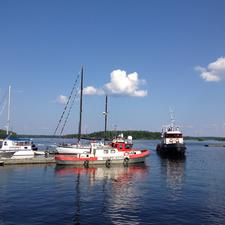
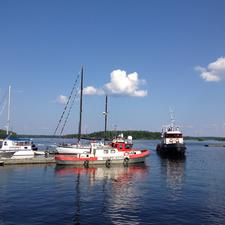
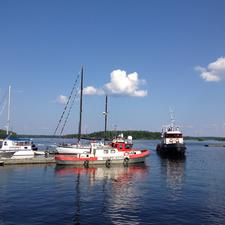
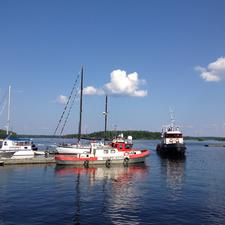

In [65]:
@file:DependsOn("com.github.jai-imageio:jai-imageio-core:1.3.0")

import javax.imageio.ImageIO
import java.net.URL
import org.jetbrains.letsPlot.geom.Extensions.create

fun imagePlot(): Plot {
    val url = "https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png"
    val image = RasterData.create(ImageIO.read(URL(url)))
    return letsPlot() + geomImshow(image)
}

gggrid(listOf(
    imagePlot() + ggtitle("Image plot", "Default"),
    imagePlot() + themeOrange() + ggtitle("Image plot", "Custom theme"),
))

### Polar Bar Plot

In [66]:
fun polarBarPlot(): Plot {
    return barPlot() + scaleYContinuous(trans = "symlog") + coordPolar(ylim = Pair(-.5, null))
}

gggrid(listOf(
    polarBarPlot() + ggtitle("Polar bar plot", "Default"),
    polarBarPlot() + themeOrange() + ggtitle("Polar bar plot", "Custom theme"),
))

<path d="M144.5 128.47160093671738 L147.62698553465881 128.77958213030348 L150.6338027688544 129.6916901665101 L153.4049014025191 131.17287324502192 L155.83378966921126 133.16621033078874 L157.82712675497808 135.5950985974809 L159.3083098334899 138.3661972311456 L160.22041786969652 141.37301446534119 L160.52839906328262 144.5 L160.22041786969652 147.62698553465881 L159.3083098334899 150.6338027688544 L157.82712675497808 153.4049014025191 L155.83378966921126 155.83378966921126 L153.4049014025191 157.82712675497808 L150.6338027688544 159.3083098334899 L147.62698553465881 160.22041786969652 L144.5 160.52839906328262 L141.37301446534119 160.22041786969652 L138.3661972311456 159.3083098334899 L135.5950985974809 157.82712675497808 L133.16621033078874 155.83378966921126 L131.17287324502192 153.4049014025191 L129.6916901665101 150.6338027688544 L128.77958213030348 147.62698553465881 L128.47160093671738 144.5 L128.77958213030348 141.37301446534119 L129.6916901665101 138.3661972311456 L131.17287324502192 135.5950985974809 L133.16621033078874 133.16621033078874 L135.5950985974809 131.17287324502192 L138.3661972311456 129.6916901665101 L141.37301446534119 128.77958213030348 L144.5 128.47160093671738 " stroke="rgb(233,233,233)" stroke-opacity="1.0" stroke-width="1.0" fill="none">
 
 <path d="M144.5 64.35800468358687 L152.35528920121988 64.74391029607091 L160.1349276732941 65.89791065151735 L167.7639932449536 67.80889209566249 L175.16901384427194 70.45845083255051 L182.27867507488156 73.82107016314899 L189.0245070125955 77.86436622510956 L195.34154360820682 82.54939986706515 L201.16894834605625 87.83105165394375 L206.45060013293485 93.65845639179318 L211.13563377489044 99.9754929874045 L215.178929836851 106.72132492511844 L218.5415491674495 113.83098615572808 L221.1911079043375 121.23600675504639 L223.10208934848265 128.86507232670593 L224.2560897039291 136.64471079878012 L224.64199531641313 144.5 L224.2560897039291 152.35528920121988 L223.10208934848265 160.13492767329407 L221.1911079043375 167.7639932449536 L218.5415491674495 175.16901384427194 L215.178929836851 182.27867507488156 L211.13563377489044 189.0245070125955 L206.45060013293485 195.34154360820682 L201.16894834605625 201.16894834605625 L195.34154360820682 206.45060013293485 L189.0245070125955 211.13563377489044 L182.27867507488156 215.178929836851 L175.16901384427194 218.5415491674495 L167.7639932449536 221.1911079043375 L160.1349276732941 223.10208934848265 L152.35528920121988 224.2560897039291 L144.5 224.64199531641313 L136.64471079878015 224.2560897039291 L128.8650723267059 223.10208934848265 L121.23600675504639 221.1911079043375 L113.83098615572808 218.5415491674495 L106.72132492511847 215.178929836851 L99.97549298740451 211.13563377489044 L93.65845639179318 206.45060013293488 L87.83105165394375 201.16894834605625 L82.54939986706518 195.34154360820685 L77.86436622510956 189.0245070125955 L73.82107016314899 182.27867507488156 L70.45845083255053 175.16901384427197 L67.80889209566251 167.7639932449536 L65.89791065151736 160.1349276732941 L64.74391029607091 152.35528920121985 L64.35800468358687 144.5 L64.74391029607091 136.64471079878018 L65.89791065151736 128.8650723267059 L67.8088920956625 121.23600675504639 L70.45845083255051 113.83098615572806 L73.82107016314899 106.72132492511847 L77.86436622510956 99.9754929874045 L82.54939986706515 93.65845639179318 L87.83105165394373 87.83105165394375 L93.65845639179315 82.54939986706518 L99.9754929874045 77.86436622510956 L106.72132492511844 73.82107016314899 L113.83098615572803 70.45845083255051 L121.23600675504638 67.80889209566251 L128.8650723267059 65.89791065151738 L136.64471079878015 64.74391029607091 L144.49999999999997 64.35800468358687 " stroke="rgb(233,233,233)" stroke-opacity="1.0" stroke-width="1.0" fill="none">
 
 
 
 
 
 
 
 
 <path d="M128.97516256745453 148.48610075448101 L128.47950998408908 143.99653581861514 L129.2560866250859 139.54695229682218 L131.24322249803834 135.4907033129482 L134.28311391979824 132.1499062612457

### Marginal Plot

In [67]:
fun marginalPlot(): Plot {
    return pointPlot() + ggmarginal("tr", layer = geomDensity())
}

gggrid(listOf(
    marginalPlot() + ggtitle("Marginal plot", "Default"),
    marginalPlot() + themeOrange() + ggtitle("Marginal plot", "Custom theme"),
))

10 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 
 
 
 
 15 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 25 
 
 
 
 
 
 
 30 
 
 
 
 
 
 
 35 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 45 
 
 
 
 
 
 
 
 <path d="M13.278570359334253 24.45894073427761 L13.278570359334253 24.45894073427761 L13.79827957104989 24.28343144246588 L14.31798878276551 24.102161299368845 L14.837697994481118 23.9149304313776 L15.357407206196754 23.721554344268572 L15.87711641791239 23.521868096671003 L16.39682562962801 23.315730470828424 L16.916534841343648 23.103028066636085 L17.436244053059255 22.883679242370008 L17.95595326477489 22.657637824382167 L18.475662476490513 22.424896508404633 L18.99537168820615 22.18548987705269 L19.515080899921784 21.939496961670926 L20.034790111637406 21.68704328181992 L20.554499323353014 21.42830230241905 L21.07420853506865 21.163496256754932 L21.593917746784285 20.892896293130566 L22.113626958499907 20.616821913706087 L22.633336170215543 20.335639685894982 L23.15304538193115 20.049761219306028 L23.672754593646786 19.759640414430436 L24.192463805362408 19.465770002798934 L24.712173017078044 19.168677411902067 L25.231882228793665 18.86892000149536 L25.7515914405093 18.56707973070575 L26.27130065222491 18.26375732733615 L26.791009863940545 17.959566041661933 L27.31071907565618 17.655125076556942 L27.830428287371802 17.35105279376426 L28.350137499087438 17.047959802315393 L28.869846710803046 16.746442039356722 L29.38955592251868 16.447073955811497 L29.909265134234303 16.150401919332957 L30.42897434594994 15.856937944833398 L30.94868355766556 15.567153858525009 L31.468392769381182 15.281475994944513 L31.988101981096804 15.00028051795688 L32.50781119281244 14.723889446404332 L33.02752040452806 14.452567453079716 L33.5472296162437 14.186519492294902 L34.066938827959305 13.925889296759063 L34.58664803967494 13.670758769066191 L35.10635725139058 13.42114827714753 L35.6260664631062 13.177017846890557 L36.145775674821834 12.938269229107174 L36.66548488653744 12.70474880248294 L37.18519409825309 12.476251259374735 L37.7049033099687 12.252524007665642 L38.224612521684335 12.033272209594589 L38.74432173339996 11.818164367828494 L39.26403094511558 11.606838360227197 L39.78374015683123 11.398907817950281 L40.303449368546836 11.193968736888912 L40.82315858026246 10.991606209953087 L41.342867791978094 10.791401167529457 L41.86257700369373 10.592937015423821 L42.38228621540935 10.395806063742256 L42.90199542712497 10.19961564632769 L43.421704638840595 10.003993838380051 L43.94141385055623 9.80859468956605 L44.46112306227185 9.613102901007643 L44.98083227398749 9.417237886780242 L45.500541485703096 9.220757173661589 L46.02025069741873 9.023459106544479 L46.53995990913435 8.82518484086695 L47.05966912084999 8.62581961730491 L47.579378332565625 8.42529332752412 L48.09908754428123 8.223580392714183 L48.618796755996854 8.02069898866587 L49.13850596771249 7.816709662073649 L49.65821517942811 7.61171339232806 L50.17792439114376 7.405849161166795 L50.697633602859355 7.199291099021465 L51.217342814575005 6.9922452816574605 L51.73705202629063 6.7849462537075915 L52.25676123800625 6.577653356939141 L52.77647044972187 6.370646940601297 L53.29617966143749 6.164224529062874 L53.81588887315314 5.958697018257208 L54.335598084868764 5.754384967373792 L54.855307296584385 5.5516150459123 L55.37501650830001 5.350716688863361 L55.89472572001563 5.152019004601428 L56.41443493173128 4.9558479712776204 L56.9341441434469 4.762523948350811 L57.45385335516252 4.572359520565296 L57.973562566878144 4.385657682461389 L58.493271778593765 4.202710362543591 L59.012980990309416 4.0237972777826485 L59.53269020202501 3.849185101331379 L60.05239941374066 3.6791269193704004 L60.57210862545628 3.5138619469992243 L61.0918178371719 3.3536154681424577 L61.61152704888755 3.198598960640876 L62.131236260603146 3.049010365082374 L62.131236260603146 3.049010365082374 L62.650945472318796 2.9050344545091598 L63.17065468403442 2.766843261915774 L63.69036389575004 2.634596523375073 L64.21007310746566 2.5

### Plot Group

In [68]:
import org.jetbrains.letsPlot.intern.figure.SubPlotsFigure

fun plotGroup(subtitle: String): SubPlotsFigure {
    return gggrid(listOf(
        barPlot() + ggtitle("Plot group", subtitle),
        barPlot()
    ), ncol = 1)
}

gggrid(listOf(
    plotGroup("Default"),
    plotGroup("Custom theme") + themeOrange()
))

52 
 
 
 
 
 
 
 
 
 168 
 
 
 
 
 <path d="M154.34363772519652 79.80442176870748 C154.34363772519652 79.80442176870748 156.2936377251965 79.80442176870748 156.2936377251965 77.85442176870748 L156.2936377251965 68.75442176870749 C156.2936377251965 68.75442176870749 156.2936377251965 66.80442176870748 154.34363772519652 66.80442176870748 L150.26303226972828 66.80442176870748 C150.26303226972828 66.80442176870748 148.3130322697283 66.80442176870748 148.3130322697283 68.75442176870749 L148.3130322697283 77.85442176870748 C148.3130322697283 77.85442176870748 148.3130322697283 79.80442176870748 150.26303226972828 79.80442176870748 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M211.8165943280125 81.28401360544218 C211.8165943280125 81.28401360544218 213.7665943280125 81.28401360544218 213.7665943280125 79.33401360544218 L213.7665943280125 70.23401360544219 C213.7665943280125 70.23401360544219 213.7665943280125 68.28401360544218 211.8165943280125 68.28401360544218 L207.73598887254428 68.28401360544218 C207.73598887254428 68.28401360544218 205.7859888725443 68.28401360544218 205.7859888725443 70.23401360544219 L205.7859888725443 79.33401360544218 C205.7859888725443 79.33401360544218 205.7859888725443 81.28401360544218 207.73598887254428 81.28401360544218 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M269.28955093082857 83.25680272108843 C269.28955093082857 83.25680272108843 271.23955093082856 83.25680272108843 271.23955093082856 81.30680272108843 L271.23955093082856 72.20680272108844 C271.23955093082856 72.20680272108844 271.23955093082856 70.25680272108843 269.28955093082857 70.25680272108843 L265.20894547536034 70.25680272108843 C265.20894547536034 70.25680272108843 263.25894547536035 70.25680272108843 263.25894547536035 72.20680272108844 L263.25894547536035 81.30680272108843 C263.25894547536035 81.30680272108843 263.25894547536035 83.25680272108843 265.20894547536034 83.25680272108843 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 Plot group 
 
 
 
 
 Default 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M43.38802724729861 119.5 C43.38802724729861 119.5 45.33802724729861 119.5 45.33802724729861 117.55 L45.33802724729861 108.45 C45.33802724729861 108.45 45.33802724729861 106.5 43.38802724729861 106.5 L31.326816336362203 106.5 C31.326816336362203 106.5 29.376816336362204 106.5 29.376816336362204 108.45 L29.376816336362204 117.55 C29.376816336362204 117.55 29.376816336362204 119.5 31.326816336362203 119.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M104.85128657784873 119.5 C104.85128657784873 119.5 106.80128657784873 119.5 106.80128657784873 117.55 L106.80128657784873 108.45 C106.80128657784873 108.45 106.80128657784873 106.5 104.85128657784873 106.5 L84.80947021144412 106.5 C84.80947021144412 106.5 82.85947021144412 106.5 82.85947021144412 108.45 L82.85947021144412 117.55 C82.85947021144412 117.55 82.85947021144412 119.5 84.80947021144412 119.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M154.34363772519652 117.03571428571429 C154.34363772519652 117.03571428571429 156.2936377251965 117.03571428571429 156.2936377251965 115

## Set up Global Theme

In [69]:
LetsPlot.theme = themeBW() + flavorDarcula() + theme(panelGrid = elementLine(linetype = "longdash"))

In [70]:
barPlot()

<path d="M63.93048007748729 334.5 C63.93048007748729 334.5 65.88048007748729 334.5 65.88048007748729 332.55 L65.88048007748729 323.45 C65.88048007748729 323.45 65.88048007748729 321.5 63.93048007748729 321.5 L51.869269166550886 321.5 C51.869269166550886 321.5 49.91926916655088 321.5 49.91926916655088 323.45 L49.91926916655088 332.55 C49.91926916655088 332.55 49.91926916655088 334.5 51.869269166550886 334.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(48,48,48)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 52 
 
 
 
 
 <path d="M156.99751299294306 334.5 C156.99751299294306 334.5 158.94751299294305 334.5 158.94751299294305 332.55 L158.94751299294305 323.45 C158.94751299294305 323.45 158.94751299294305 321.5 156.99751299294306 321.5 L136.95569662653844 321.5 C136.95569662653844 321.5 135.00569662653845 321.5 135.00569662653845 323.45 L135.00569662653845 332.55 C135.00569662653845 332.55 135.00569662653845 334.5 136.95569662653844 334.5 Z" stroke="rgb(255,255,255)" stroke-opacity="1.0" fill="rgb(48,48,48)" fill-opacity="0.0" stroke-width="0.0">
 
 
 
 168 
 
 
 
 
 <path d="M238.09363772519652 322.28514739229024 C238.09363772519652 322.28514739229024 240.0436377251965 322.28514739229024 240.0436377251965 320.33514739229025 L240.0436377251965 311.23514739229023 C240.0436377251965 311.23514739229023 240.0436377251965 309.28514739229024 238.09363772519652 309.28514739229024 L234.01303226972828 309.28514739229024 C234.01303226972828 309.28514739229024 232.0630322697283 309.28514739229024 232.0630322697283 311.23514739229023 L232.0630322697283 320.33514739229025 C232.0630322697283 320.33514739229025 232.0630322697283 322.28514739229024 234.01303226972828 322.28514739229024 Z" stroke="rgb(187,187,187)" stroke-opacity="1.0" fill="rgb(48,48,48)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 8 
 
 
 
 
 <path d="M327.1703679129182 328.0844671201814 C327.1703679129182 328.0844671201814 329.1203679129182 328.0844671201814 329.1203679129182 326.1344671201814 L329.1203679129182 317.0344671201814 C329.1203679129182 317.0344671201814 329.1203679129182 315.0844671201814 327.1703679129182 315.0844671201814 L323.08976245745 315.0844671201814 C323.08976245745 315.0844671201814 321.13976245745 315.0844671201814 321.13976245745 317.0344671201814 L321.13976245745 326.1344671201814 C321.13976245745 326.1344671201814 321.13976245745 328.0844671201814 323.08976245745 328.0844671201814 Z" stroke="rgb(187,187,187)" stroke-opacity="1.0" fill="rgb(48,48,48)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 5 
 
 
 
 
 <path d="M416.24709810063985 335.81689342403627 C416.24709810063985 335.81689342403627 418.19709810063983 335.81689342403627 418.19709810063983 333.8668934240363 L418.19709810063983 324.76689342403625 C418.19709810063983 324.76689342403625 418.19709810063983 322.81689342403627 416.24709810063985 322.81689342403627 L412.1664926451716 322.81689342403627 C412.1664926451716 322.81689342403627 410.2164926451716 322.81689342403627 410.2164926451716 324.76689342403625 L410.2164926451716 333.8668934240363 C410.2164926451716 333.8668934240363 410.2164926451716 335.81689342403627 412.1664926451716 335.81689342403627 Z" stroke="rgb(187,187,187)" stroke-opacity="1.0" fill="rgb(48,48,48)" fill-opacity="0.75" stroke-width="0.0">
 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 c 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 
 
 count 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 fl 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 r 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 e 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 d 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 c